In [1]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as pgo
import seaborn as sns

In [2]:
wc_df = pd.read_csv('CWC23_all_innings.csv') 

In [3]:
wc_df.head(5)

team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 NaN NaN NaN      NaN   NaN  
2   10.0   1.0   4.8     1 NaN NaN NaN      NaN   NaN  
3   10.0   0.0   4.9     1 NaN NaN NaN      NaN   NaN  
4   10.0   0.0   4.9     1 NaN NaN NaN      NaN   NaN

In [4]:
wc_df.shape

(1408, 20)

In [5]:
wc_df.describe()

bb_bf         runs        wkts  wicketball_prob  runs_per_ball  \
count  1408.000000  1408.000000  562.000000      1408.000000    1408.000000   
mean     35.305398    33.237216    1.204626         0.070574       0.898755   
std      25.248709    28.056329    1.198237         0.152535       0.471051   
min       0.000000     0.000000    0.000000         0.000000       0.000000   
25%      13.750000    11.000000    0.000000         0.010724       0.621350   
50%      32.000000    29.000000    1.000000         0.032258       0.879005   
75%      54.000000    49.000000    2.000000         0.062500       1.130819   
max     143.000000   201.000000    7.000000         1.000000       6.000000   

            overs        mdns        econ         inns          4s  \
count  562.000000  562.000000  562.000000  1408.000000  846.000000   
mean     7.342527    0.256228    5.946637     1.470881    2.605201   
std      2.679736    0.532547    2.141566     0.499329    3.146922   
min      0.300000    0.000000    1.350000     1.000000    0.000000   
25%      5.550000    0.000000    4.500000     1.000000    0.000000   
50%      8.000000    0.000000    5.675000     1.000000    2.000000   
75%     10.000000    0.000000    7.120000     2.000000    4.000000   
max     10.000000    3.000000   16.000000     2.000000   21.000000   

               6s          sr     not_out        mins  
count  846.000000  846.000000  846.000000  846.000000  
mean     0.751773   83.716596    0.151300   42.721040  
std      1.504184   52.475444    0.358553   41.576908  
min      0.000000    0.000000    0.000000    1.000000  
25%      0.000000   51.610000    0.000000   12.000000  
50%      0.000000   81.810000    0.000000   28.000000  
75%      1.000000  107.020000    0.000000   60.000000  
max     11.000000  600.000000    1.000000  217.000000

In [6]:
wc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [7]:
wc_df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [8]:
runs = wc_df['runs_per_ball']
wc_df['runs_per_ball']=[round(value, 2) for value in runs]
print(wc_df['runs_per_ball'])

0       0.75
1       0.75
2       0.80
3       0.82
4       0.82
        ... 
1403    0.85
1404    1.31
1405    1.43
1406    1.05
1407    1.35
Name: runs_per_ball, Length: 1408, dtype: float64


In [9]:
wicket = wc_df['wicketball_prob']
wc_df['wicketball_prob']=[round(value, 2) for value in wicket]
print(wc_df['wicketball_prob'])

0       0.05
1       0.05
2       0.05
3       0.05
4       0.05
        ... 
1403    0.00
1404    0.00
1405    0.00
1406    0.00
1407    0.00
Name: wicketball_prob, Length: 1408, dtype: float64


In [10]:
overs = wc_df['overs']
wc_df['overs']=[round(value, 2) for value in overs]
print(wc_df['overs'])

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
1403    10.0
1404     7.0
1405     7.0
1406    10.0
1407     8.0
Name: overs, Length: 1408, dtype: float64


In [11]:
md = wc_df['mdns']
wc_df['mdns']=[round(value, 2) for value in md]
print(wc_df['mdns'])

0       0.0
1       2.0
2       1.0
3       0.0
4       0.0
       ... 
1403    1.0
1404    0.0
1405    0.0
1406    0.0
1407    0.0
Name: mdns, Length: 1408, dtype: float64


In [12]:
ec = wc_df['econ']
wc_df['econ']=[round(value, 2) for value in ec]
print(wc_df['econ'])

0       4.50
1       4.50
2       4.80
3       4.90
4       4.90
        ... 
1403    5.10
1404    7.85
1405    8.57
1406    6.30
1407    8.12
Name: econ, Length: 1408, dtype: float64


In [13]:
inn = wc_df['inns']
wc_df['inns']=[round(value, 2) for value in inn]
print(wc_df['inns'])

0       2
1       1
2       1
3       1
4       1
       ..
1403    1
1404    1
1405    1
1406    2
1407    1
Name: inns, Length: 1408, dtype: int64


In [14]:
run_4 = wc_df['4s']
wc_df['4s']=[round(value, 2) for value in run_4]
print(wc_df['4s'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1403   NaN
1404   NaN
1405   NaN
1406   NaN
1407   NaN
Name: 4s, Length: 1408, dtype: float64


In [15]:
run_6 = wc_df['6s']
wc_df['6s']=[round(value, 2) for value in run_6]
print(wc_df['6s'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1403   NaN
1404   NaN
1405   NaN
1406   NaN
1407   NaN
Name: 6s, Length: 1408, dtype: float64


In [16]:
run_sr = wc_df['sr']
wc_df['sr']=[round(value, 2) for value in run_sr]
print(wc_df['sr'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1403   NaN
1404   NaN
1405   NaN
1406   NaN
1407   NaN
Name: sr, Length: 1408, dtype: float64


In [17]:
n_out = wc_df['not_out']
wc_df['not_out']=[round(value, 2) for value in n_out]
print(wc_df['not_out'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1403   NaN
1404   NaN
1405   NaN
1406   NaN
1407   NaN
Name: not_out, Length: 1408, dtype: float64


In [18]:
wc_df.head(5)

team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05           0.75  v South Africa    Chennai  27-Oct-23   
1             0.05           0.75         v India    Lucknow  29-Oct-23   
2             0.05           0.80       v England  Ahmedabad   5-Oct-23   
3             0.05           0.82    v Bangladesh    Chennai  13-Oct-23   
4             0.05           0.82      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 NaN NaN NaN      NaN   NaN  
2   10.0   1.0   4.8     1 NaN NaN NaN      NaN   NaN  
3   10.0   0.0   4.9     1 NaN NaN NaN      NaN   NaN  
4   10.0   0.0   4.9     1 NaN NaN NaN      NaN   NaN

In [19]:
# Team performance analysis

In [20]:
#Team analyiss with runs scored
wc_df['runs'] = pd.to_numeric(wc_df['runs'], errors='coerce')
team_performance = wc_df.groupby('team').agg({'runs': 'sum'}).reset_index()
figure_plot = px.bar(team_performance, x='team', y='runs', title='Team wise runs')
figure_plot.show()

In [21]:
# Team analysis using wickets each team took up
wc_df['wkts'] = pd.to_numeric(wc_df['wkts'], errors='coerce')
team_performance = wc_df.groupby('team').agg({'wkts': 'sum'}).reset_index()
figure_plot = px.bar(team_performance, x='team', y='wkts', title='Team wise wickets')
figure_plot.show()

In [22]:
# Team analysis using Batting each team took up
# Here bat and bowling are in category so lets convert it to numeric values where bowl=1 and batting =0
# upon converting the category to numeric and analysising it 

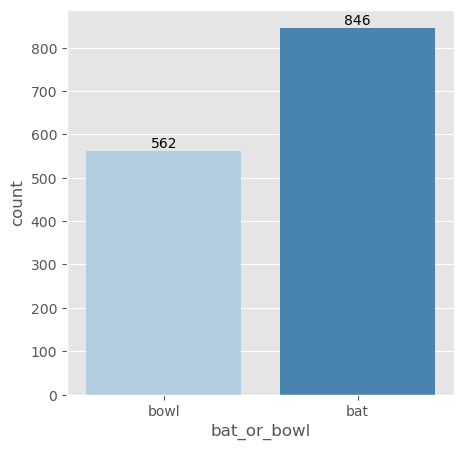

In [23]:
# View categorical analysis 

plt.style.use("ggplot")

plt.figure(figsize=(5,5))
ax = sns.countplot(x = wc_df["bat_or_bowl"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

In [24]:
# teamwise categorical analysis for bat_or_bowl 
fig = px.histogram(wc_df, x='team', color='bat_or_bowl', title='Team-wise Batting and Bowling Analysis')
fig.show()

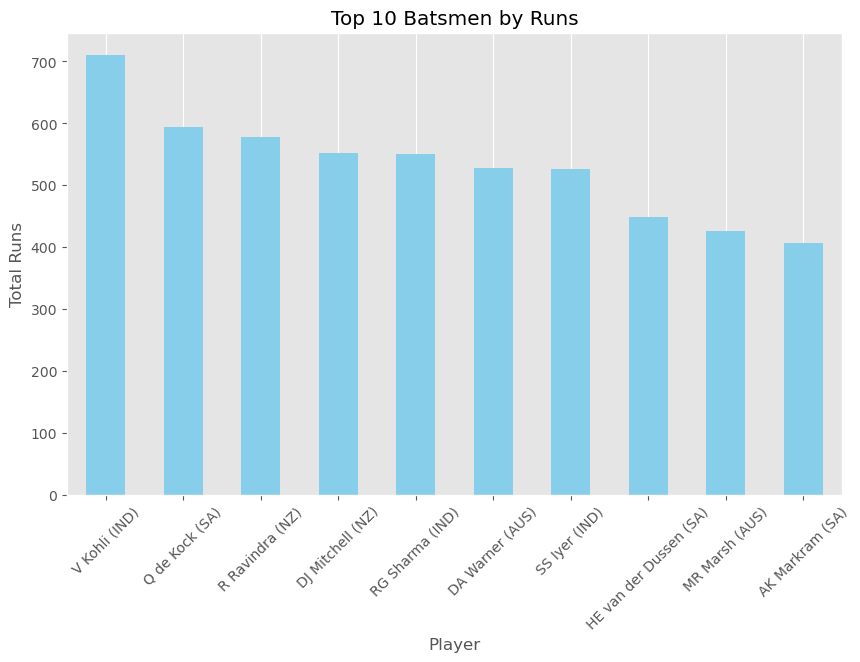

In [25]:
batsmen_df = wc_df[wc_df['bat_or_bowl'] == 'bat']

# Group by player and sum their runs
batsmen_runs = batsmen_df.groupby('player')['runs'].sum().sort_values(ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
batsmen_runs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Batsmen by Runs')

plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

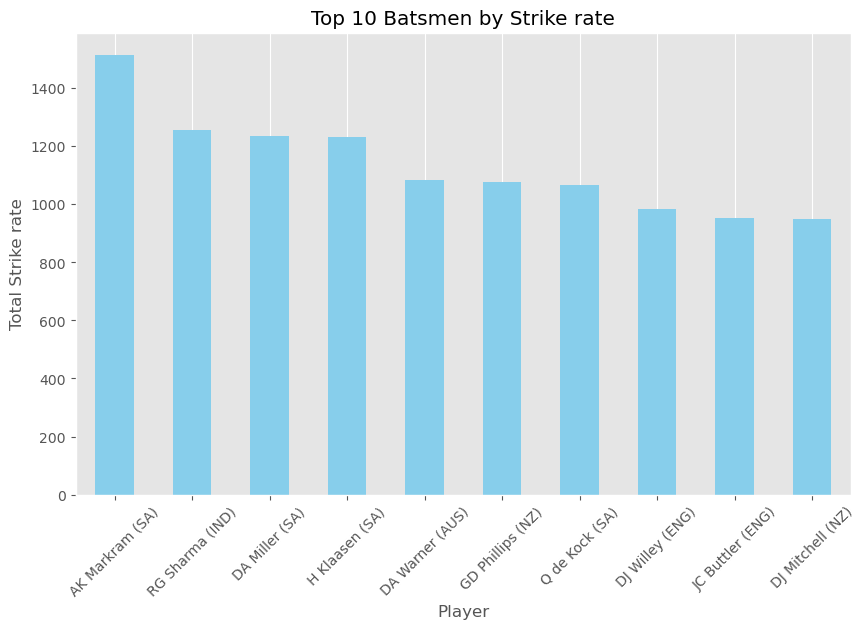

In [71]:
batsmen_df = wc_df[wc_df['bat_or_bowl'] == 'bat']

# Group by player and sum their runs
batsmen_runs = batsmen_df.groupby('player')['sr'].sum().sort_values(ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
batsmen_runs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Batsmen by Strike rate')

plt.xlabel('Player')
plt.ylabel('Total Strike rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

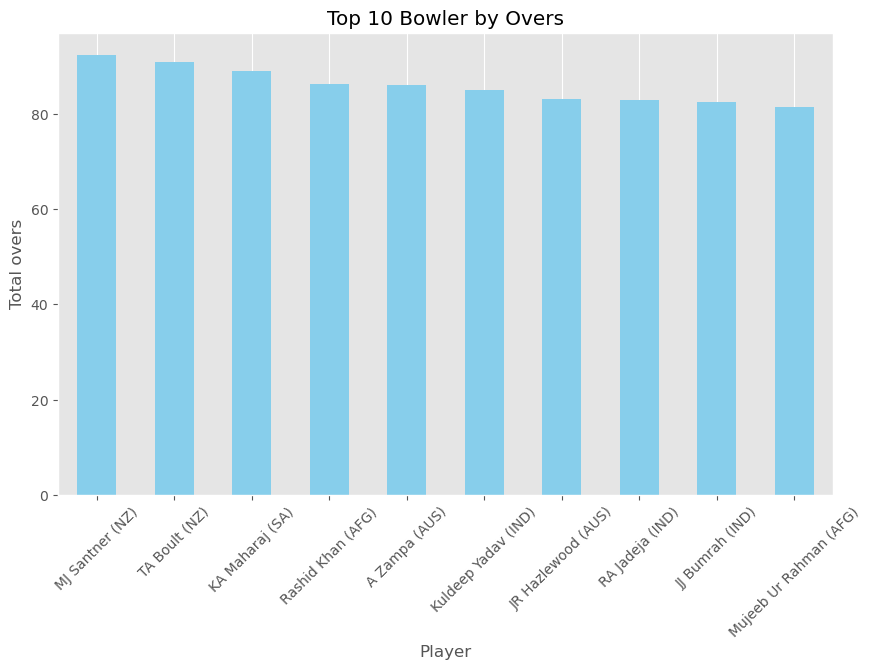

In [72]:
batsmen_df = wc_df[wc_df['bat_or_bowl'] == 'bowl']

# Group by player and sum their runs
batsmen_runs = batsmen_df.groupby('player')['overs'].sum().sort_values(ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
batsmen_runs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Bowler by Overs')

plt.xlabel('Player')
plt.ylabel('Total overs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

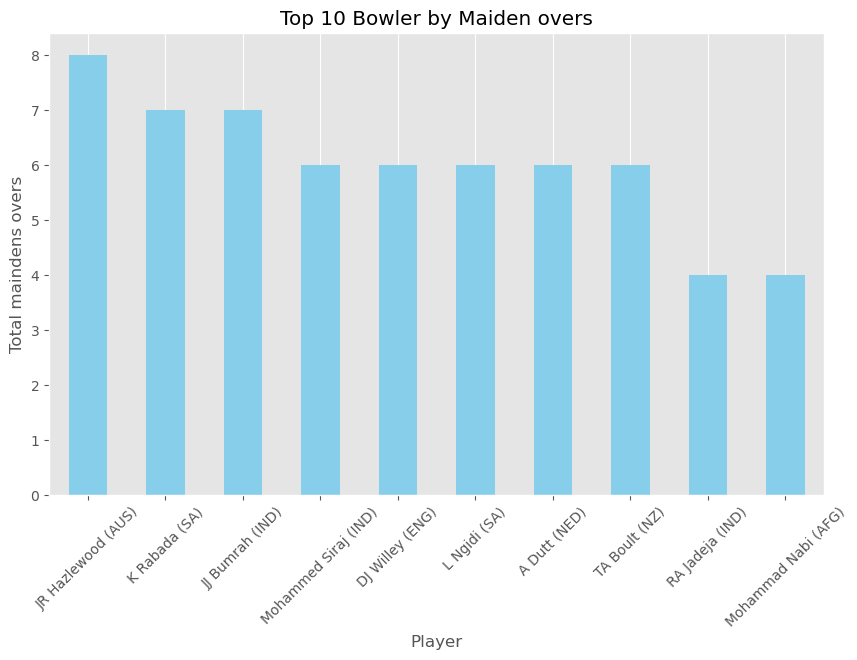

In [73]:
batsmen_df = wc_df[wc_df['bat_or_bowl'] == 'bowl']

# Group by player and sum their runs
batsmen_runs = batsmen_df.groupby('player')['mdns'].sum().sort_values(ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
batsmen_runs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Bowler by Maiden overs')

plt.xlabel('Player')
plt.ylabel('Total maindens overs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

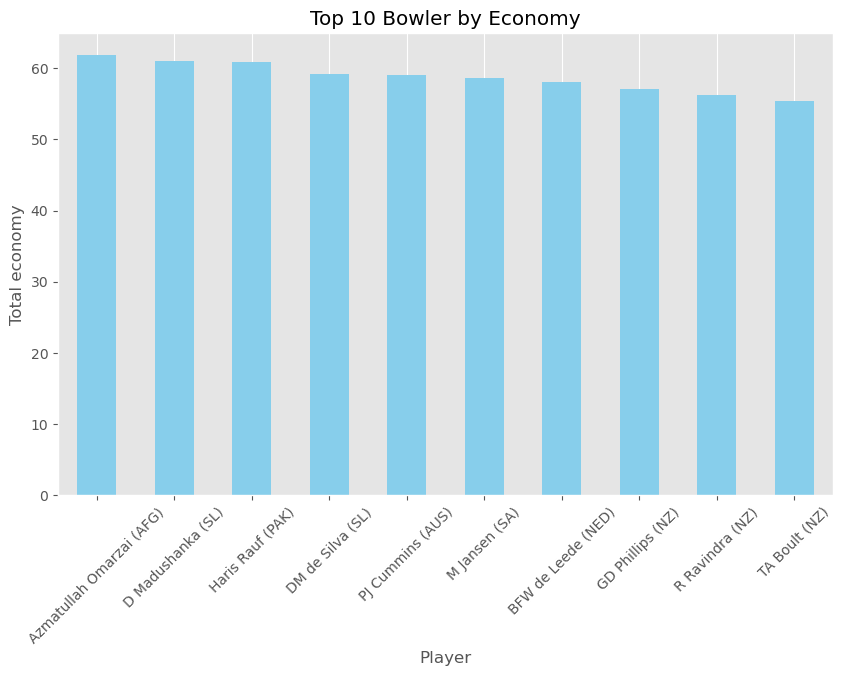

In [74]:
batsmen_df = wc_df[wc_df['bat_or_bowl'] == 'bowl']

# Group by player and sum their runs
batsmen_runs = batsmen_df.groupby('player')['econ'].sum().sort_values(ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
batsmen_runs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Bowler by Economy')

plt.xlabel('Player')
plt.ylabel('Total economy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [26]:
# analysising top 10 best team performer

top_10_teams = wc_df.groupby('team')['runs'].sum().nlargest(10).reset_index()

print(top_10_teams)

  team  runs
0   NZ  5376
1  AUS  5234
2   SA  5097
3  PAK  4786
4  IND  4783
5  ENG  4396
6   SL  4366
7  BAN  4358
8  NED  4268
9  AFG  4134


In [27]:
# pictorial analysis for performer

fig = px.line(top_10_teams, x='team', y='runs', title='Top 10 Best Performing Teams by Runs Scored')
fig.show()

In [28]:
# Player performance analysis 

team_names = wc_df['team'].unique()
print(team_names)

['PAK' 'ENG' 'NZ' 'AFG' 'NED' 'BAN' 'SA' 'SL' 'AUS' 'IND']


In [29]:
# Grouping by player and aggregating statistics
player_stats = wc_df.groupby('player').agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()

# Create bar plot
fig = px.bar(player_stats, x='player', y='runs', title=f'Runs Scored by Players in Team')
fig.show()

In [30]:
# Grouping by player and aggregating statistics
player_stats = wc_df.groupby('player').agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()

# Create bar plot
fig = px.bar(player_stats, x='player', y='wkts', title=f'Wickets taken by Players in Team')
fig.show()

In [31]:
wc_df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [32]:
wc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [33]:
missing_values = wc_df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Print columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
wkts       846
overs      846
mdns       846
econ       846
4s         562
6s         562
sr         562
not_out    562
mins       562
dtype: int64


In [34]:
# dealing with missing values in above columns for better analysis

columns_with_missing_values = ['wkts', 'overs', 'mdns', 'econ', '4s', '6s', 'sr', 'not_out', 'mins']

# Replace missing values with the mean of each column
for col in columns_with_missing_values:
    wc_df[col].fillna(wc_df[col].mean(), inplace=True)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values with mean:")
print(wc_df)

DataFrame after filling missing values with mean:
     team                     player bat_or_bowl  bb_bf  runs  wkts  \
0     PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1     ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2      NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3      NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4     AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   
...   ...                        ...         ...    ...   ...   ...   
1403   NZ            MJ Santner (NZ)        bowl     60    51   0.0   
1404  AUS              A Zampa (AUS)        bowl     42    55   0.0   
1405   NZ            R Ravindra (NZ)        bowl     42    60   0.0   
1406  IND            RA Jadeja (IND)        bowl     60    63   0.0   
1407   NZ           LH Ferguson (NZ)        bowl     48    65   0.0   

      wicketball_prob  runs_per_ball      opposition        ground start_date  \
0               

In [35]:
wc_df.isnull().sum()

team               0
player             0
bat_or_bowl        0
bb_bf              0
runs               0
wkts               0
wicketball_prob    0
runs_per_ball      0
opposition         0
ground             0
start_date         0
overs              0
mdns               0
econ               0
inns               0
4s                 0
6s                 0
sr                 0
not_out            0
mins               0
dtype: int64

In [78]:
wc_df.head(10)

team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   
5  AFG     Mujeeb Ur Rahman (AFG)        bowl     60    51   3.0   
6  ENG            AU Rashid (ENG)        bowl     48    54   3.0   
7  NED          LV van Beek (NED)        bowl     53    60   3.0   
8  BAN   Mehidy Hasan Miraz (BAN)        bowl     54    60   3.0   
9  PAK   Mohammad Wasim (1) (PAK)        bowl     60    60   3.0   

   wicketball_prob  runs_per_ball      opposition        ground  ... overs  \
0             0.05           0.75  v South Africa       Chennai  ...  10.0   
1             0.05           0.75         v India       Lucknow  ...  10.0   
2             0.05           0.80       v England     Ahmedabad  ...  10.0   
3             0.05           0.82    v Bangladesh       Chennai  ...  10.0   
4             0.05           0.82      v Pakistan       Chennai  ...  10.0   
5             0.05           0.85       v England         Delhi  ...  10.0   
6             0.06           1.12   v Netherlands          Pune  ...   8.0   
7             0.06           1.13  v South Africa    Dharamsala  ...   8.5   
8             0.06           1.11      v Pakistan  Eden Gardens  ...   9.0   
9             0.05           1.00   v New Zealand     Bengaluru  ...  10.0   

   mdns  econ  inns        4s        6s         sr  not_out      mins  \
0   0.0  4.50     2  2.605201  0.751773  83.716596   0.1513  42.72104   
1   2.0  4.50     1  2.605201  0.751773  83.716596   0.1513  42.72104   
2   1.0  4.80     1  2.605201  0.751773  83.716596   0.1513  42.72104   
3   0.0  4.90     1  2.605201  0.751773  83.716596   0.1513  42.72104   
4   0.0  4.90     1  2.605201  0.751773  83.716596   0.1513  42.72104   
5   1.0  5.10     2  2.605201  0.751773  83.716596   0.1513  42.72104   
6   0.0  6.75     2  2.605201  0.751773  83.716596   0.1513  42.72104   
7   0.0  6.79     2  2.605201  0.751773  83.716596   0.1513  42.72104   
8   0.0  6.66     2  2.605201  0.751773  83.716596   0.1513  42.72104   
9   0.0  6.00     1  2.605201  0.751773  83.716596   0.1513  42.72104   

   bat_or_bowl_encoded  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    0  
9                    0  

[10 rows x 21 columns]

In [36]:
# Grouping by player and aggregating statistics
player_stats = wc_df.groupby('player').agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()

# Create bar plot
fig = px.bar(player_stats, x='player', y='wkts', title=f'Wickets Taken by Players in Team')
fig.show()

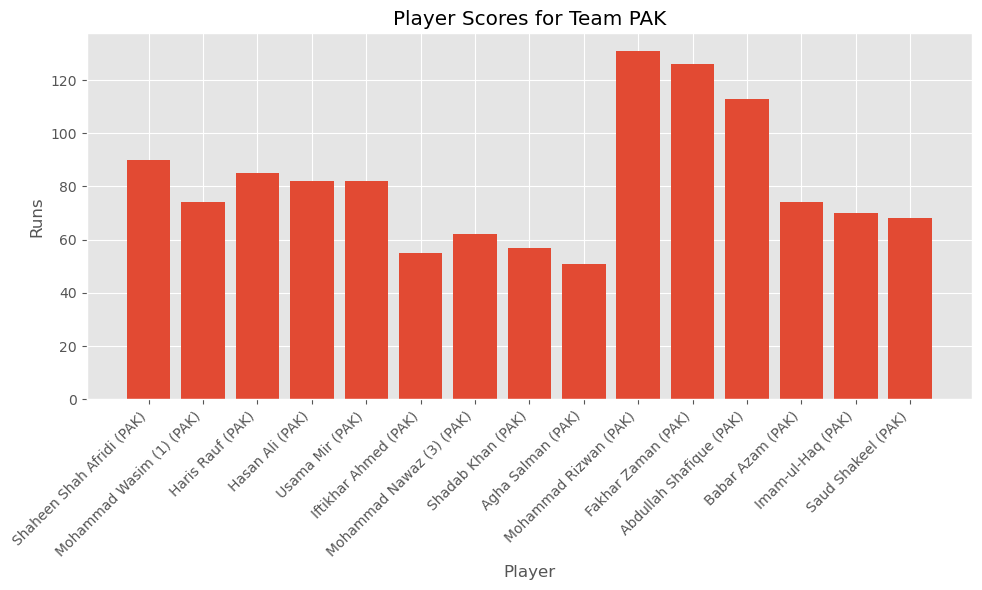

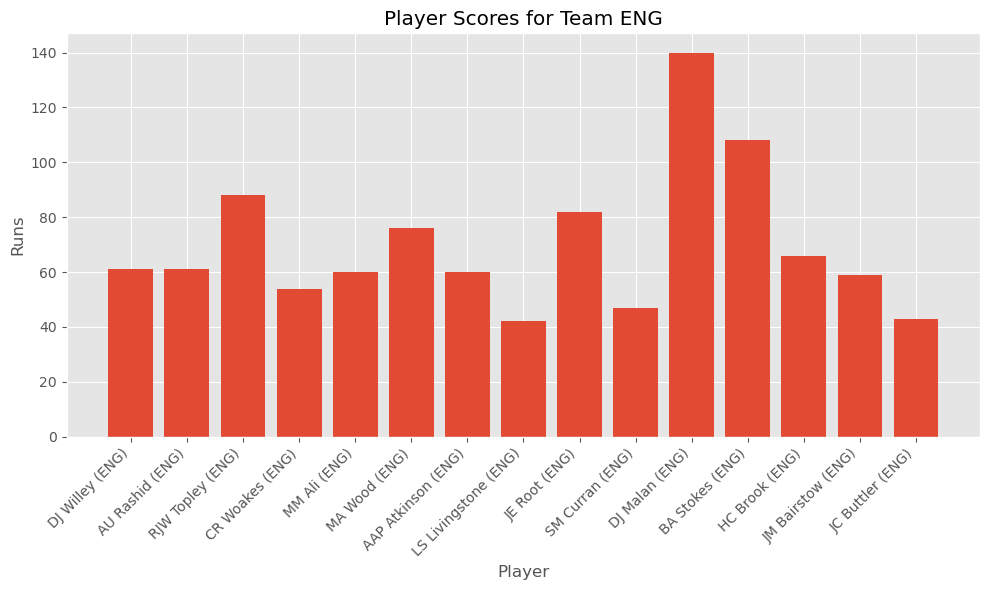

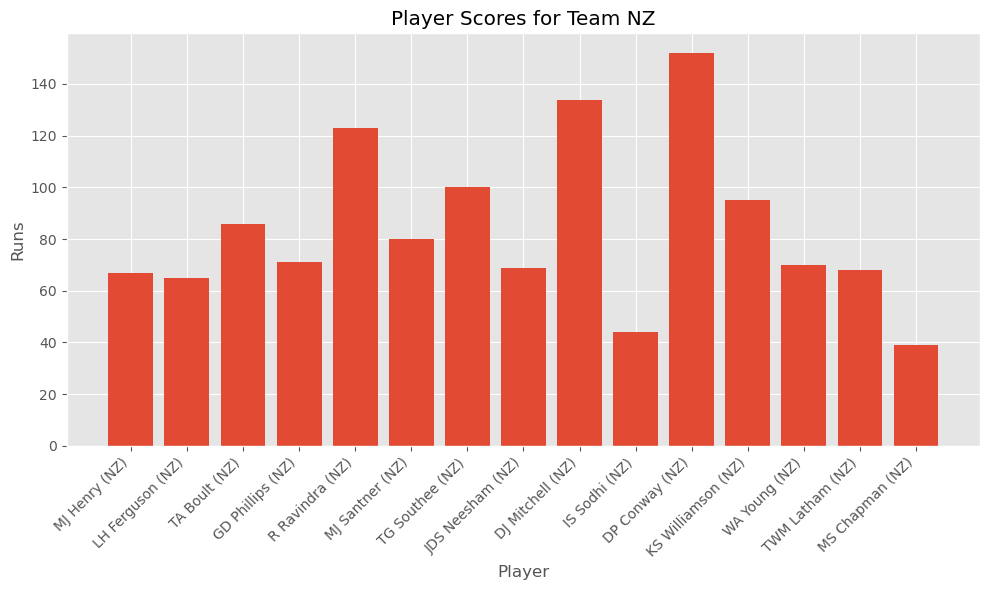

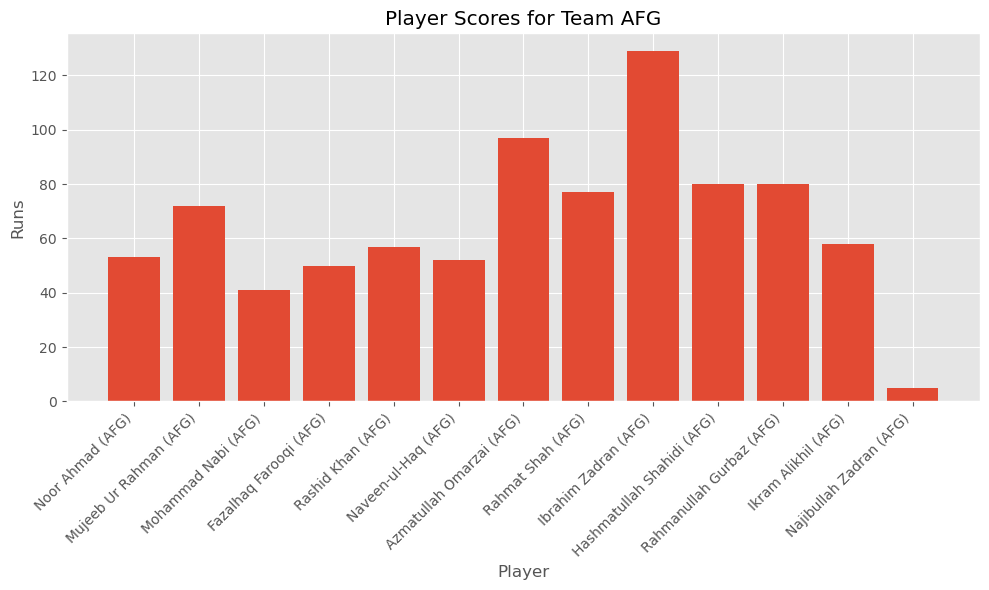

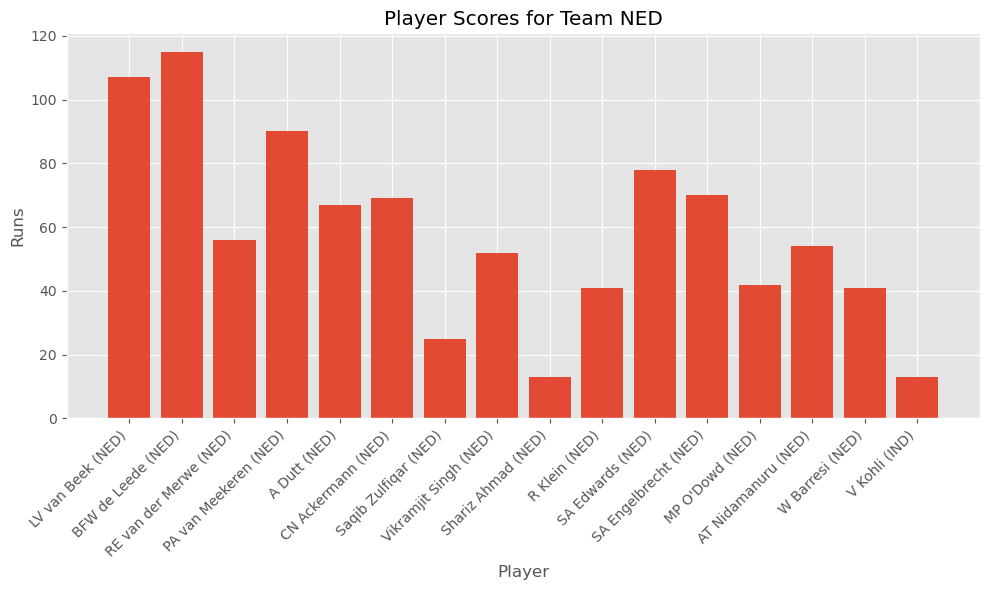

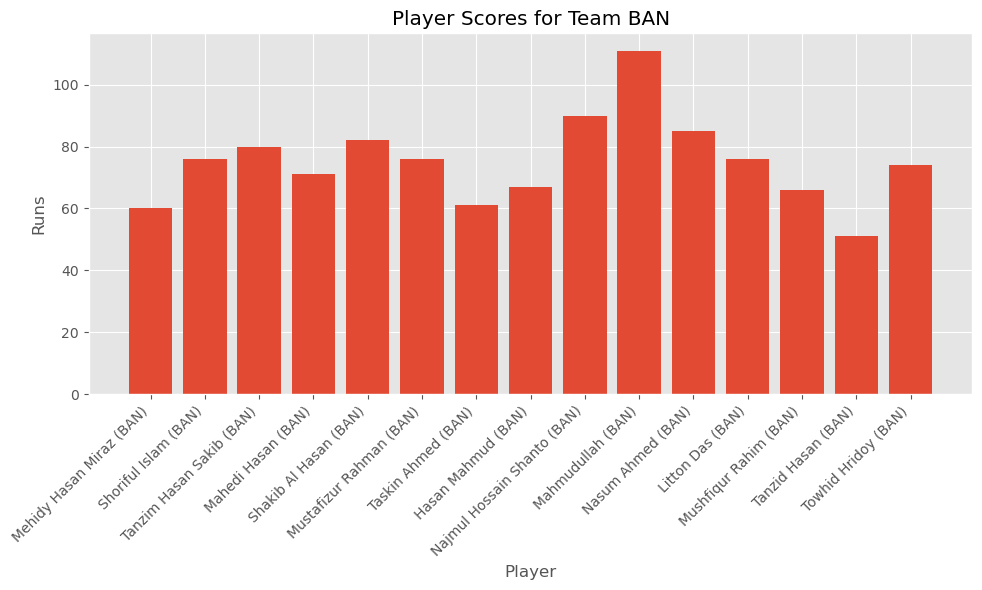

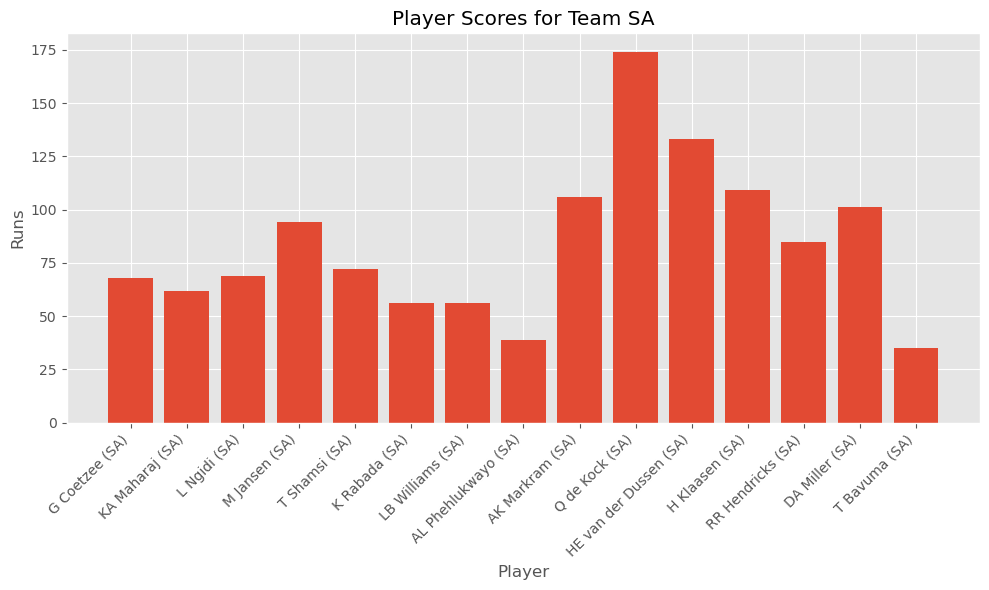

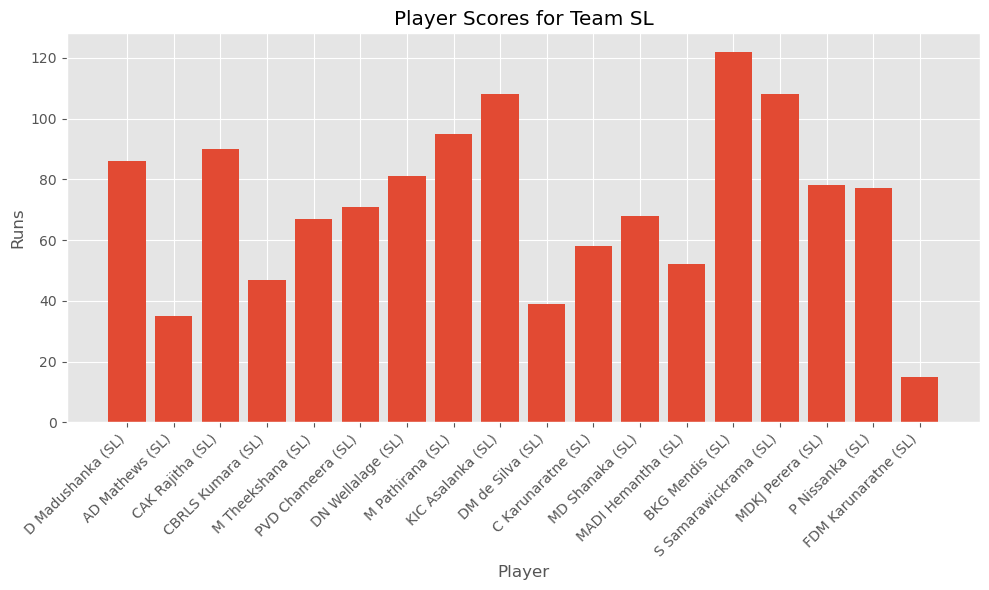

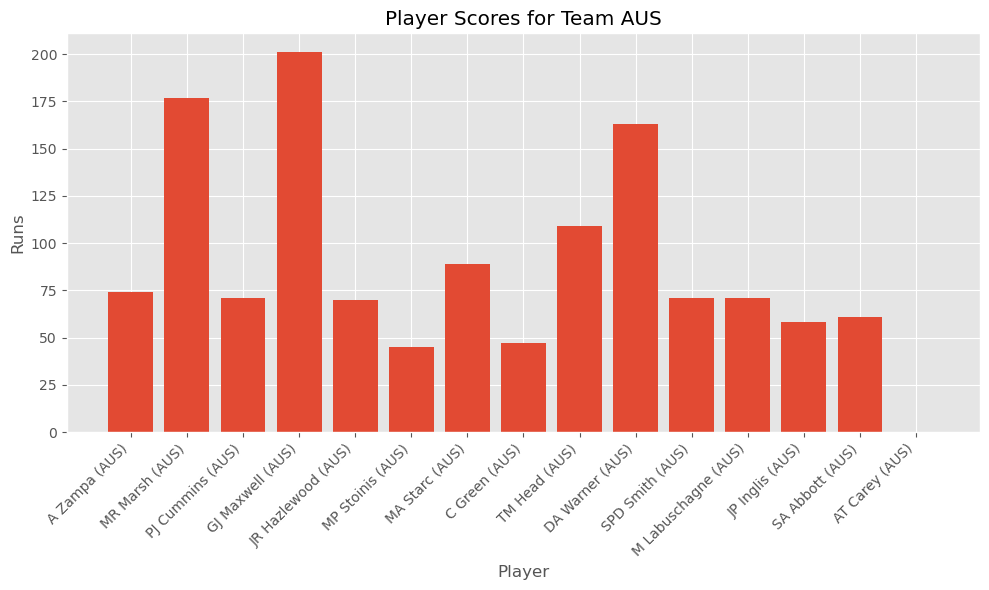

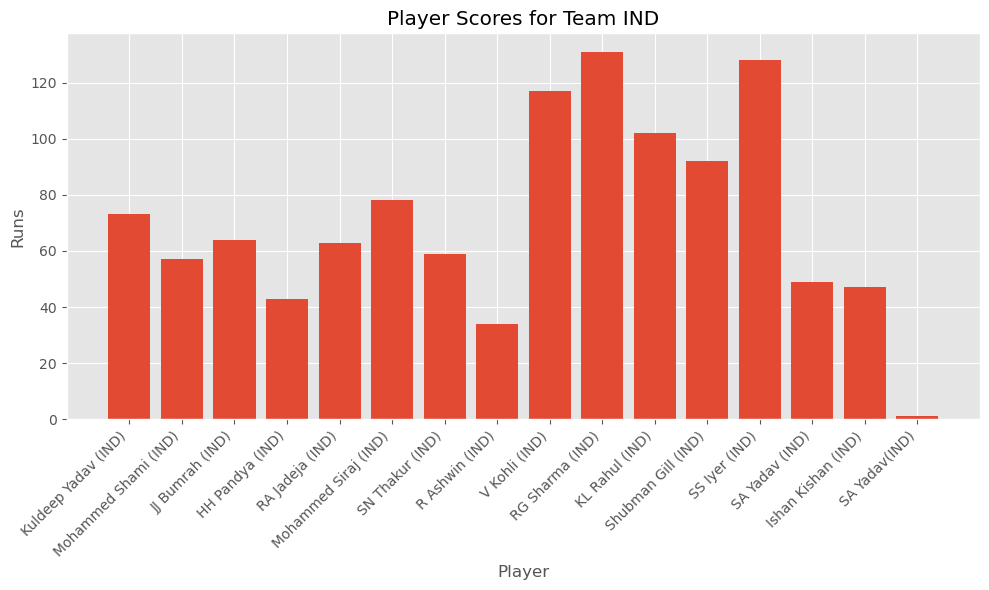

In [37]:
# Player scores teamwise

teams = ['PAK', 'ENG', 'NZ', 'AFG', 'NED', 'BAN', 'SA', 'SL', 'AUS', 'IND']

# Filter data for specified teams and plot player scores for each team
for team in teams:
    # Filter data for the current team
    team_data = wc_df[wc_df['team'] == team]
    
    # Plot player scores for the current team
    plt.figure(figsize=(10, 6))
    plt.bar(team_data['player'], team_data['runs'])
    plt.xlabel('Player')
    plt.ylabel('Runs')
    plt.title(f'Player Scores for Team {team}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

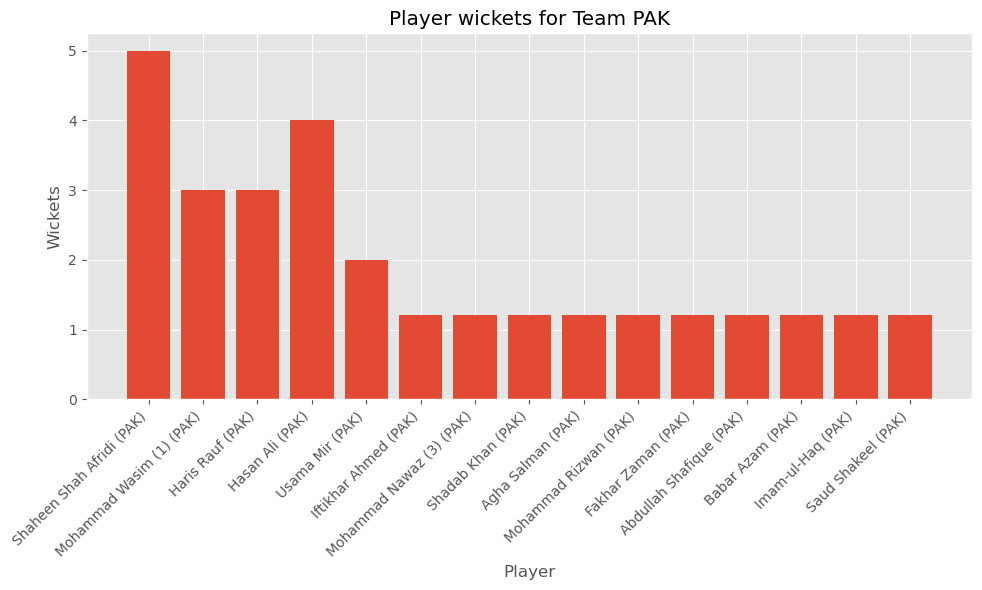

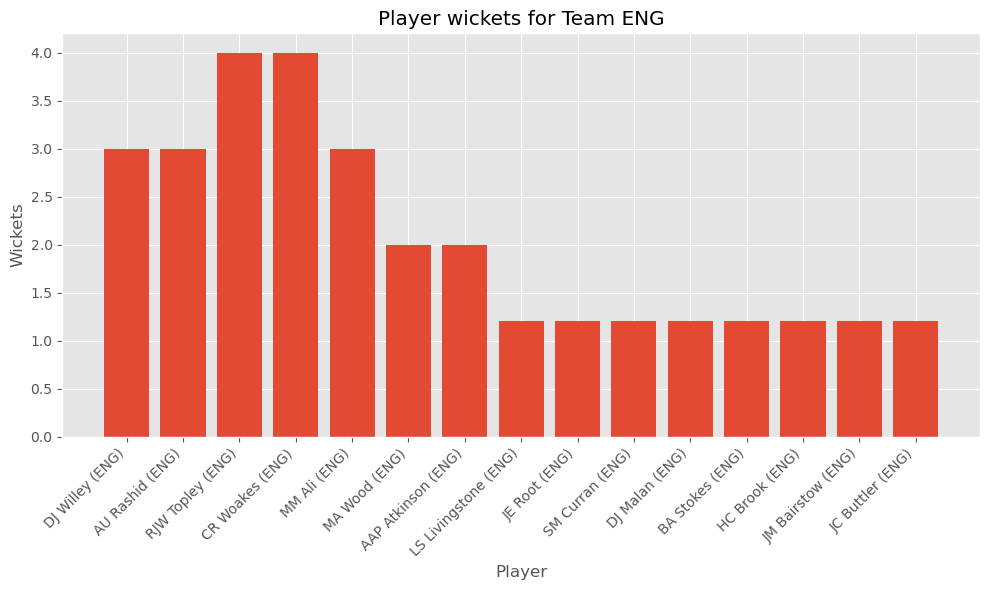

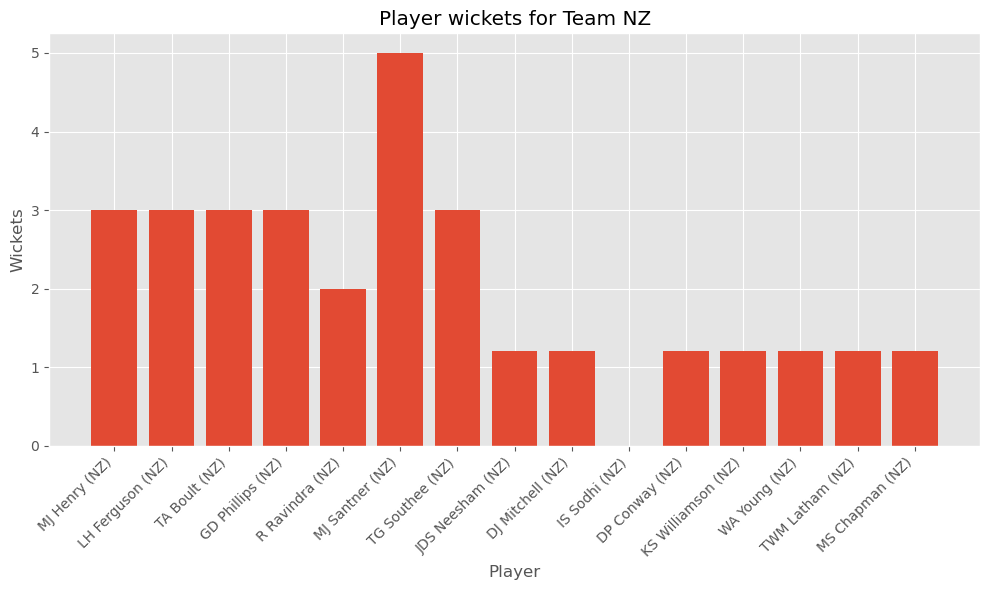

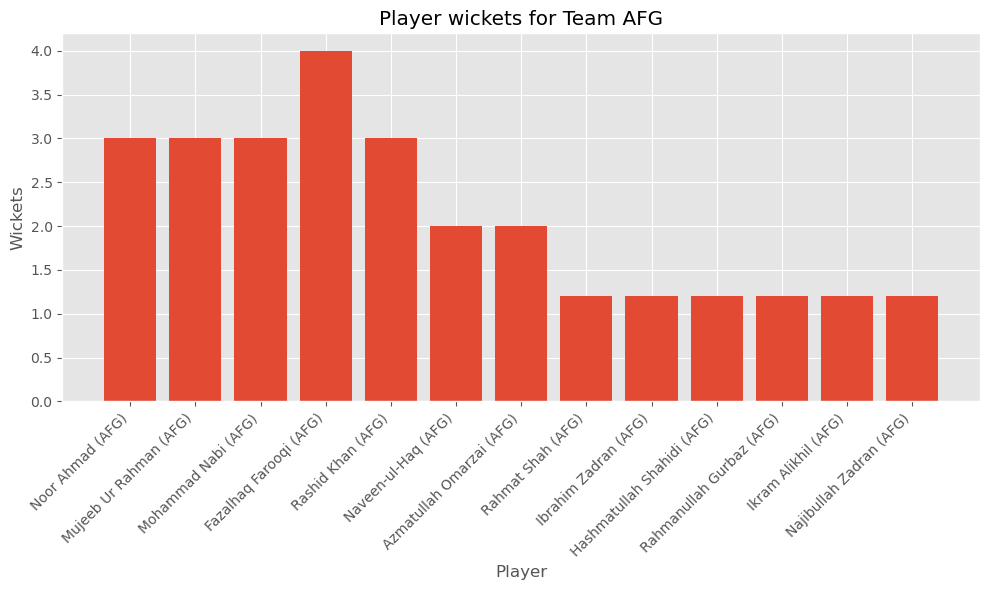

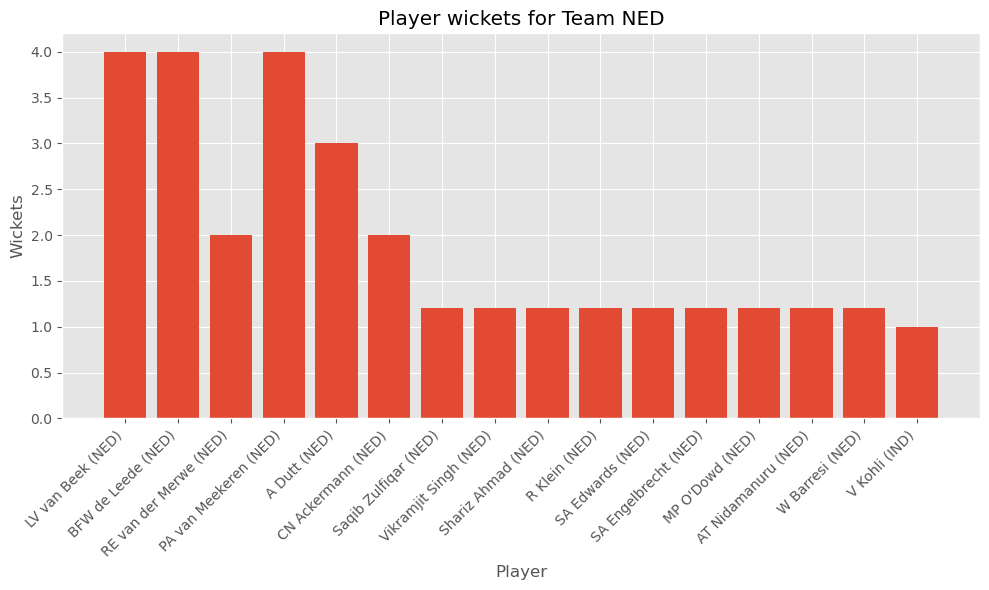

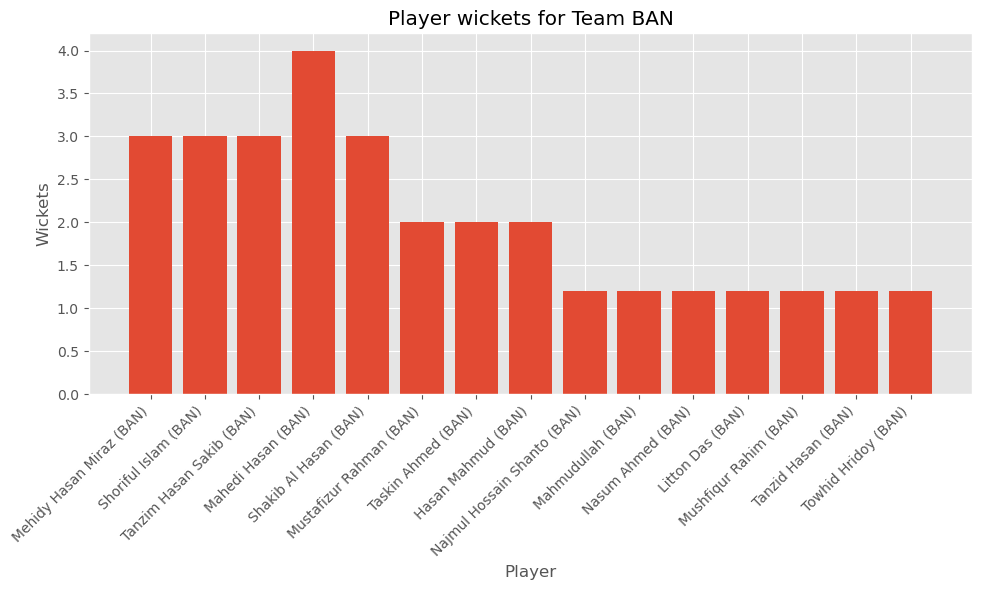

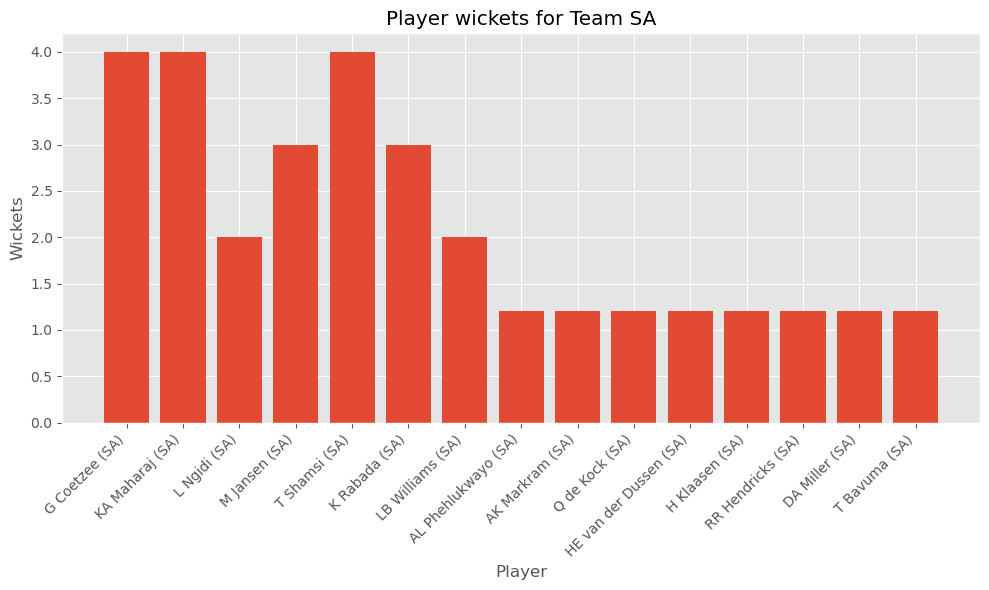

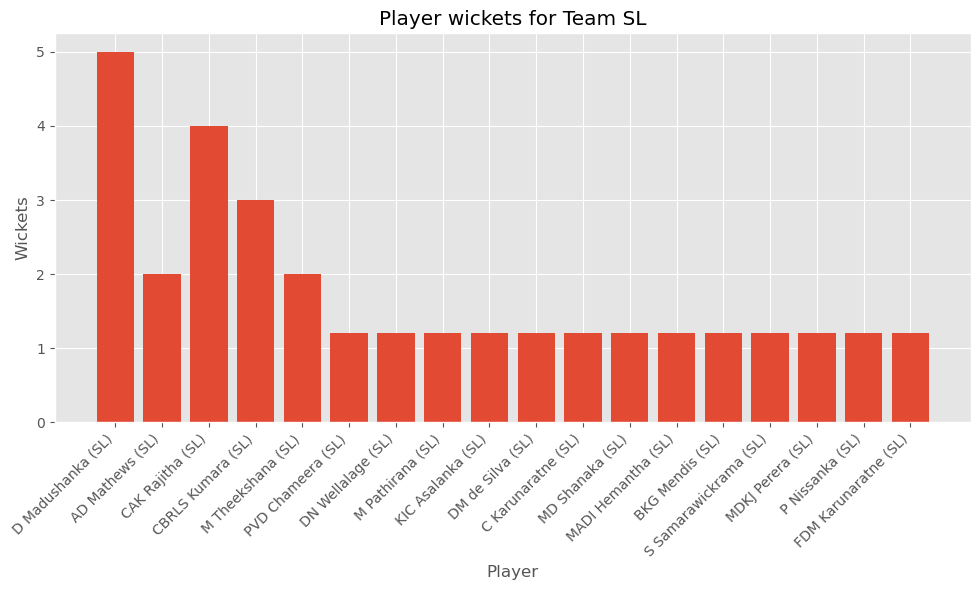

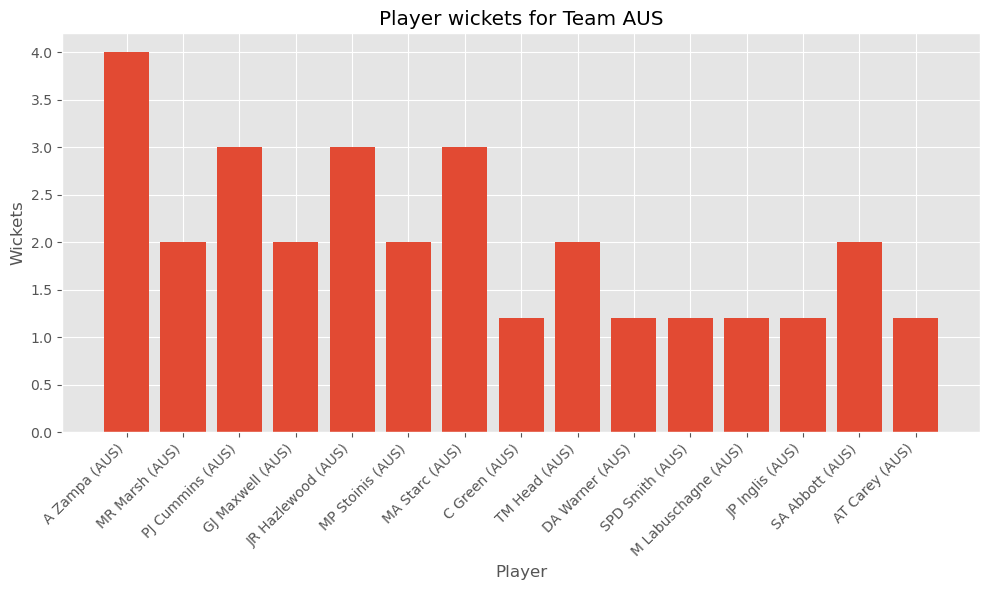

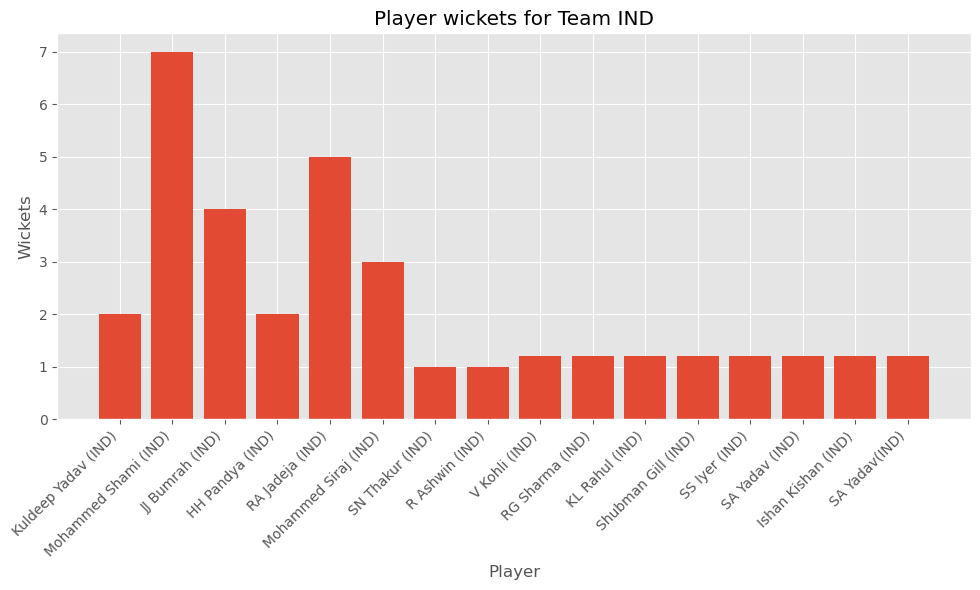

In [38]:
# Player scores teamwise

teams = ['PAK', 'ENG', 'NZ', 'AFG', 'NED', 'BAN', 'SA', 'SL', 'AUS', 'IND']

# Filter data for specified teams and plot player scores for each team
for team in teams:
    # Filter data for the current team
    team_data = wc_df[wc_df['team'] == team]
    
    # Plot player scores for the current team
    plt.figure(figsize=(10, 6))
    plt.bar(team_data['player'], team_data['wkts'])
    plt.xlabel('Player')
    plt.ylabel('Wickets')
    plt.title(f'Player wickets for Team {team}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [41]:
#top highest wickets by teams
top_10_wicket = wc_df.groupby('team')['wkts'].sum().nlargest(10).reset_index()

print(top_10_wicket)

  team        wkts
0   SA  192.802491
1  AUS  189.030249
2  ENG  183.053381
3  NED  181.053381
4  IND  173.505338
5   NZ  168.574733
6  BAN  158.211744
7  PAK  156.551601
8   SL  151.188612
9  AFG  142.142349


In [42]:
#top highest wickets by players
top_10_wickets_player = wc_df.groupby('player')['wkts'].sum().nlargest(10).reset_index()

print(top_10_wickets_player)

                      player       wkts
0              A Zampa (AUS)  29.227758
1         BFW de Leede (NED)  26.841637
2              M Jansen (SA)  26.637011
3       Mohammed Shami (IND)  26.613879
4            AU Rashid (ENG)  25.841637
5  Shaheen Shah Afridi (PAK)  25.227758
6             G Coetzee (SA)  24.818505
7          D Madushanka (SL)  24.613879
8            MJ Santner (NZ)  24.432384
9             MA Starc (AUS)  22.637011


In [43]:
#top highest wickets by players
top_10_runs_player = wc_df.groupby('player')['runs'].sum().nlargest(10).reset_index()

print(top_10_runs_player)

                     player  runs
0           R Ravindra (NZ)   971
1             V Kohli (IND)   726
2          GJ Maxwell (AUS)   693
3        BFW de Leede (NED)   626
4  Azmatullah Omarzai (AFG)   623
5         LV van Beek (NED)   616
6          PJ Cummins (AUS)   609
7             M Jansen (SA)   607
8  Mehidy Hasan Miraz (BAN)   603
9            Q de Kock (SA)   594


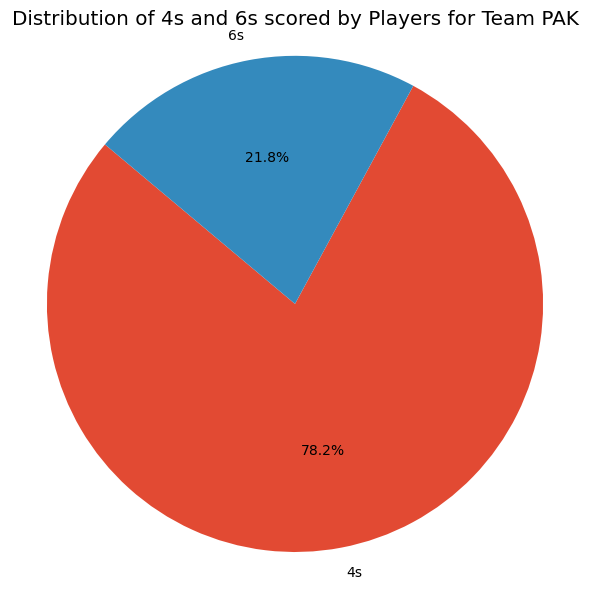

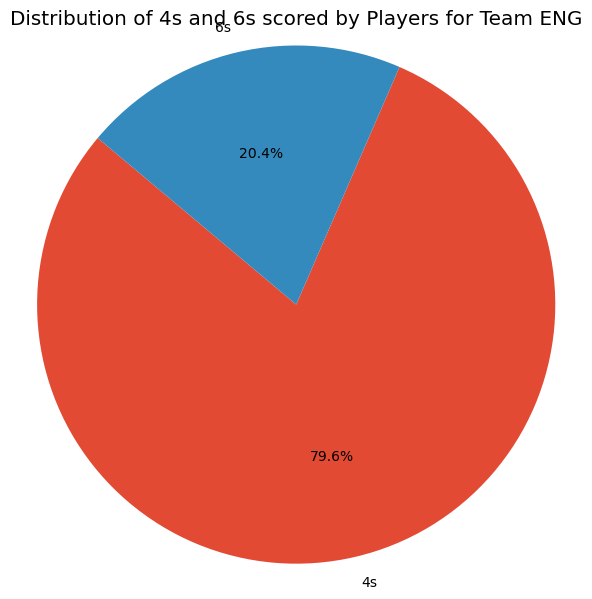

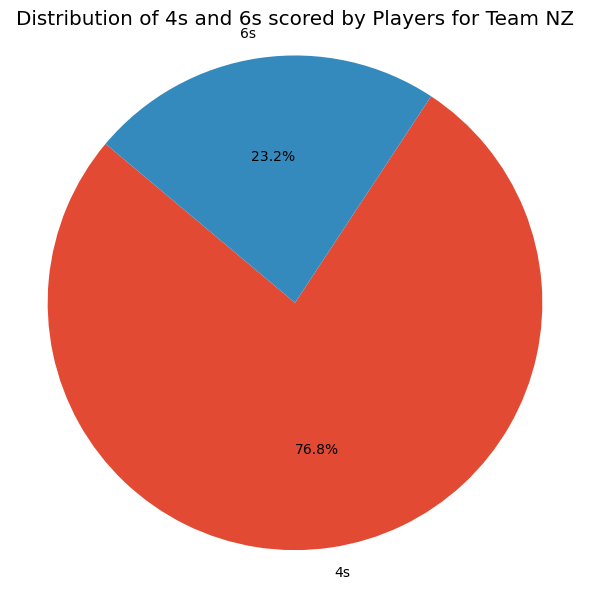

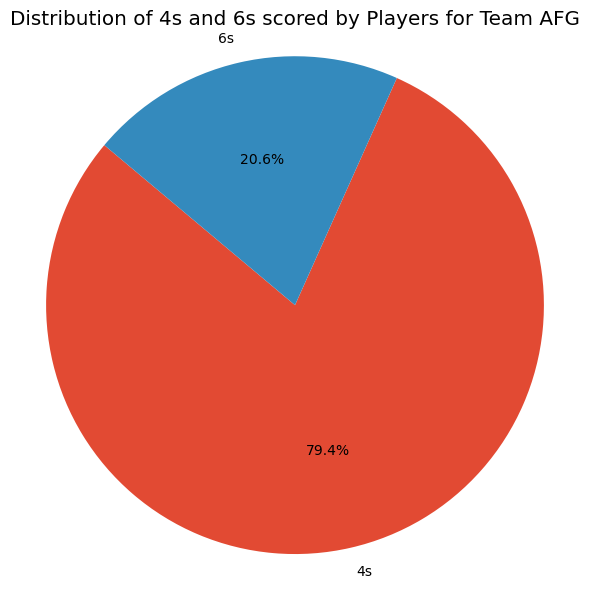

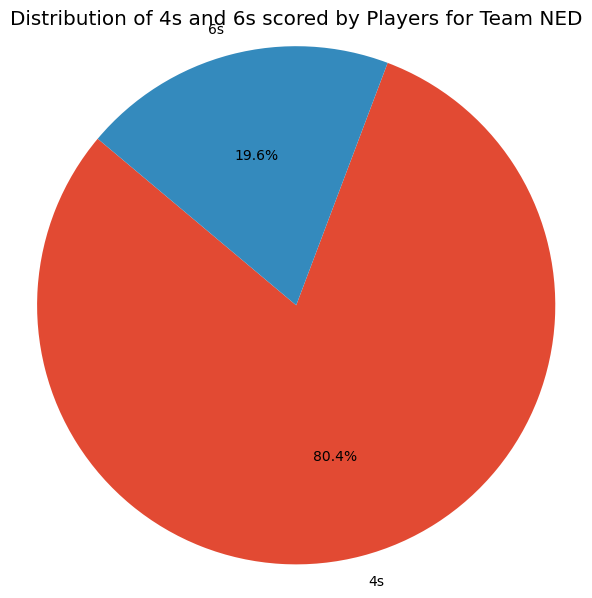

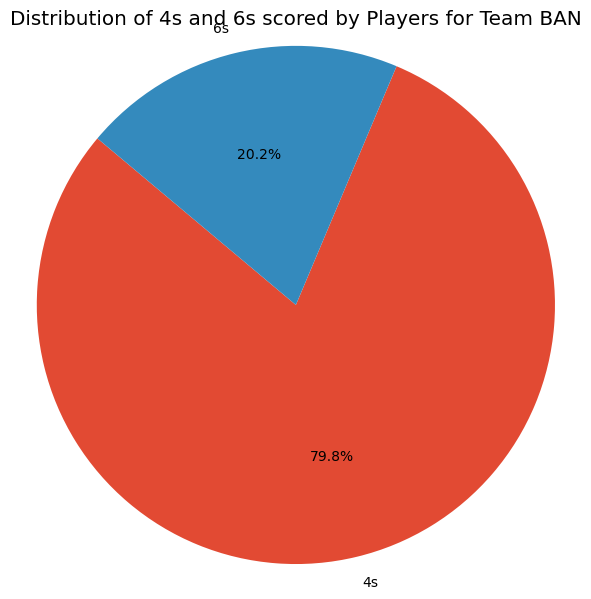

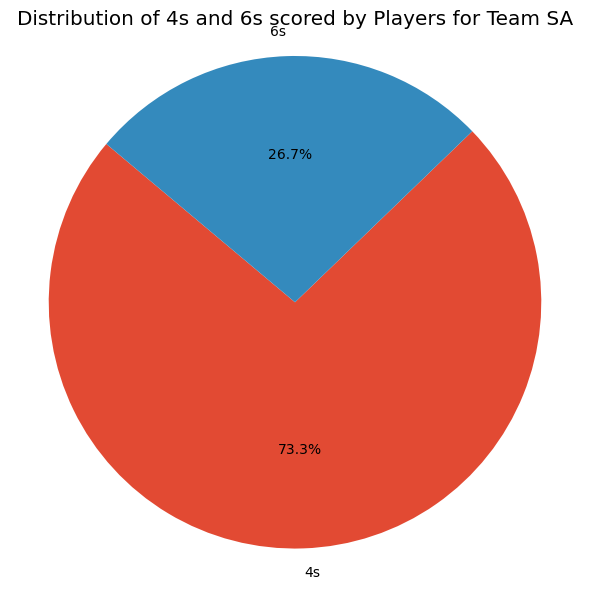

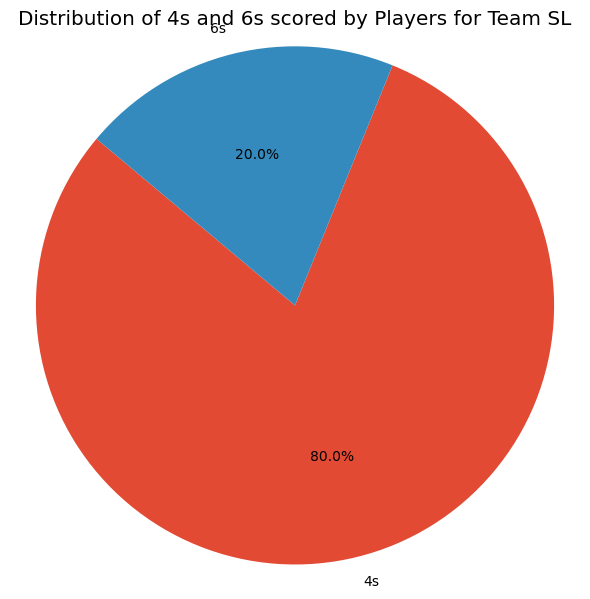

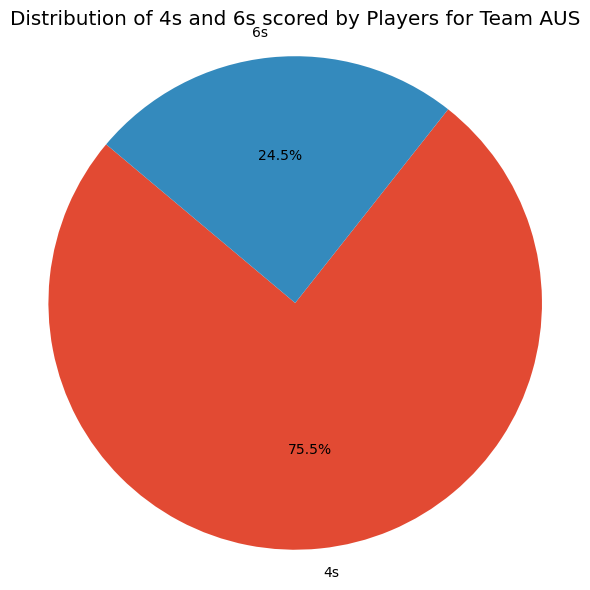

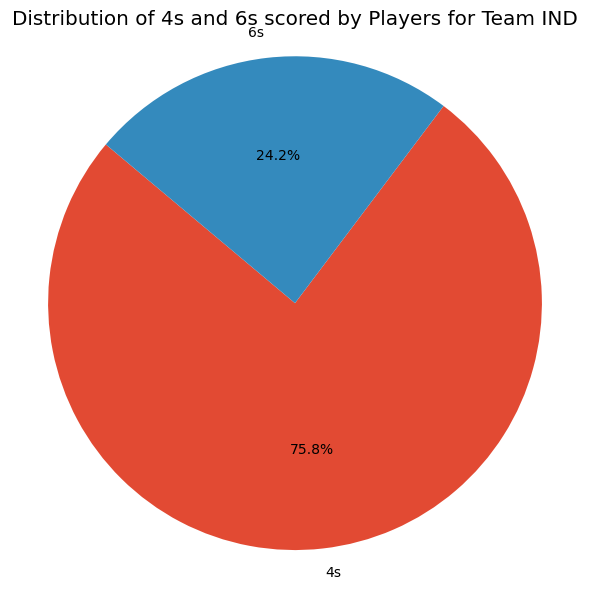

In [44]:
# team wise 
teams = ['PAK', 'ENG', 'NZ', 'AFG', 'NED', 'BAN', 'SA', 'SL', 'AUS', 'IND']

for team in teams:
    # Filter data for the current team
    team_data = wc_df[wc_df['team'] == team]
    
    # Calculate total 4s and 6s scored by players for the current team
    total_4s = team_data['4s'].sum()
    total_6s = team_data['6s'].sum()
    
    # Create labels and sizes for the pie chart
    labels = ['4s', '6s']
    sizes = [total_4s, total_6s]
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of 4s and 6s scored by Players for Team {team}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [ ]:
#top highest runs by teams
top_10_team_runs = wc_df.groupby('team')['runs'].sum().nlargest(10).reset_index()

print(top_10_team_runs)

In [ ]:
# Runs scored in innings
pd.DataFrame(wc_df.groupby('inns')['runs_per_ball'].count())

In [ ]:
# count of players that remained not out in eAach team
pd.DataFrame(wc_df.groupby(['team'])['not_out'].sum().round(2)).head(10)


In [ ]:
# Runs covered in total overs for each team
team_overs_sum=pd.DataFrame(wc_df.groupby(['team'])['overs'].sum().round(2)).head(10)
team_overs_df = pd.DataFrame(team_overs_sum).reset_index()

# Sort the DataFrame by the sum of overs in descending order
team_overs_sorted = team_overs_df.sort_values(by='overs', ascending=False)
print(team_overs_sorted.head(10))

In [ ]:
# opposition and ground analysis

wc_df["ground"].value_counts()

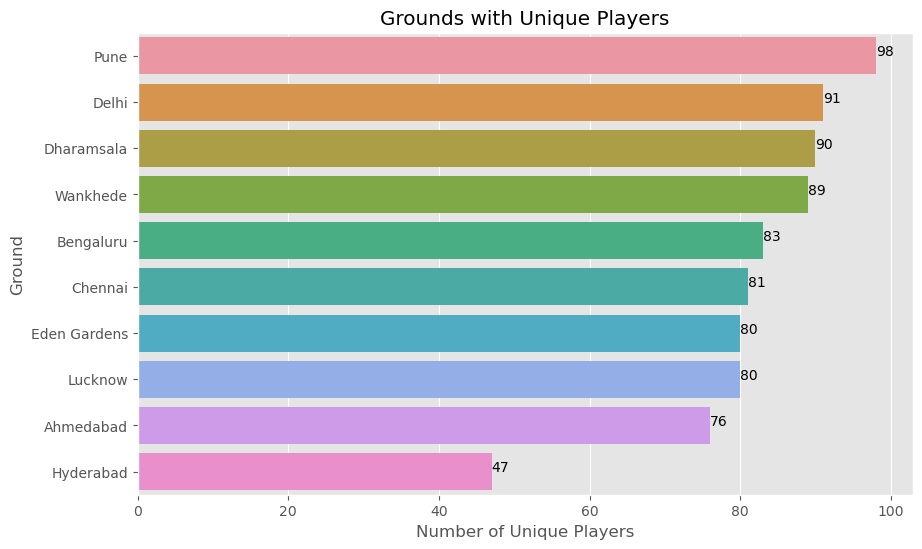

In [45]:
ground_player_count = wc_df.groupby('ground')['player'].nunique().reset_index()

# Sort the DataFrame by the number of unique players per ground in descending order
ground_player_count_sorted = ground_player_count.sort_values(by='player', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='player', y='ground', data=ground_player_count_sorted)
# Show player count on the bars
for index, value in enumerate(ground_player_count_sorted['player']):
    plt.text(value, index, str(value))
plt.xlabel('Number of Unique Players')
plt.ylabel('Ground')
plt.title('Grounds with Unique Players')
plt.show()

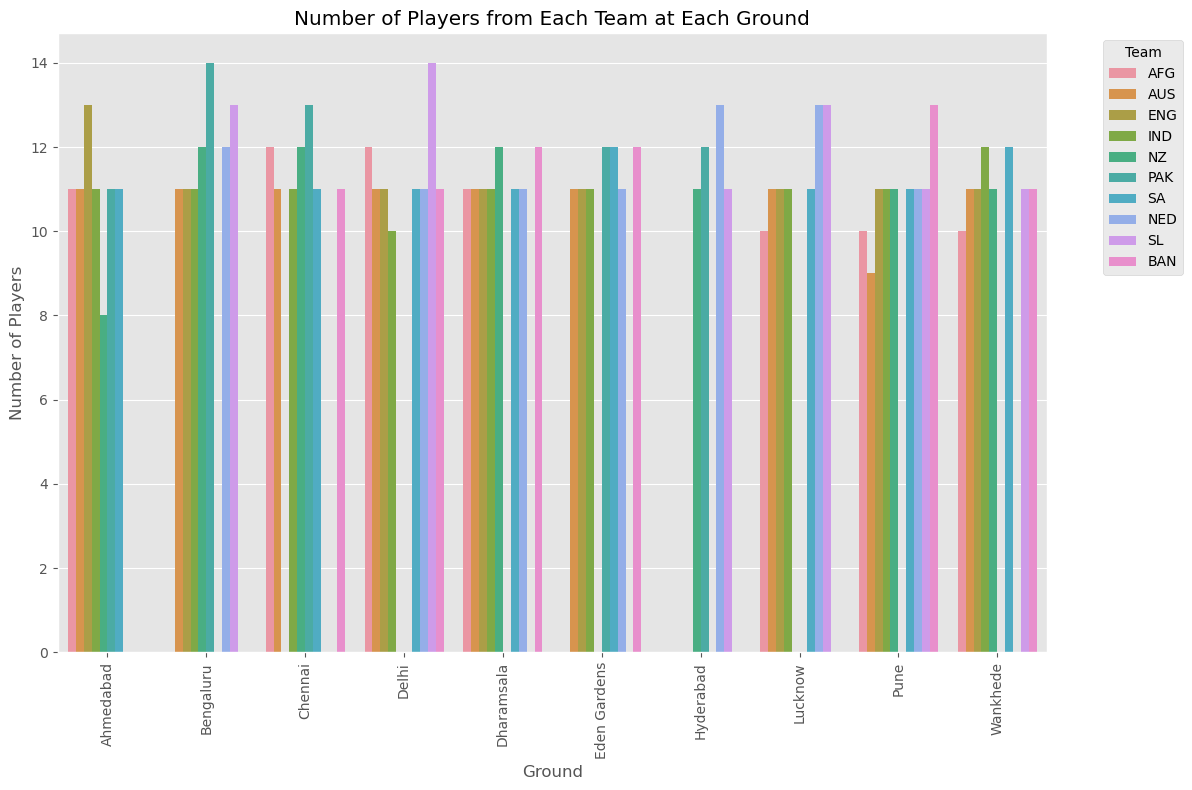

In [46]:
# Analysis how many teams played on each ground
ground_team_count = wc_df.groupby(['ground', 'team'])['player'].nunique().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='ground', y='player', hue='team', data=ground_team_count)
plt.xlabel('Ground')
plt.ylabel('Number of Players')
plt.title('Number of Players from Each Team at Each Ground')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

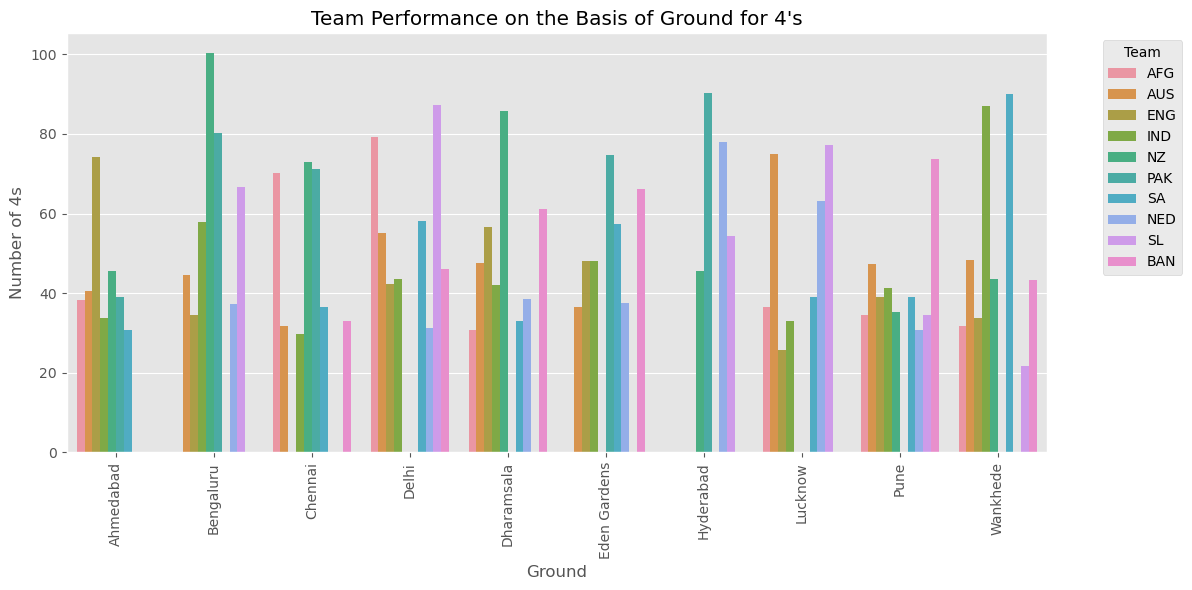

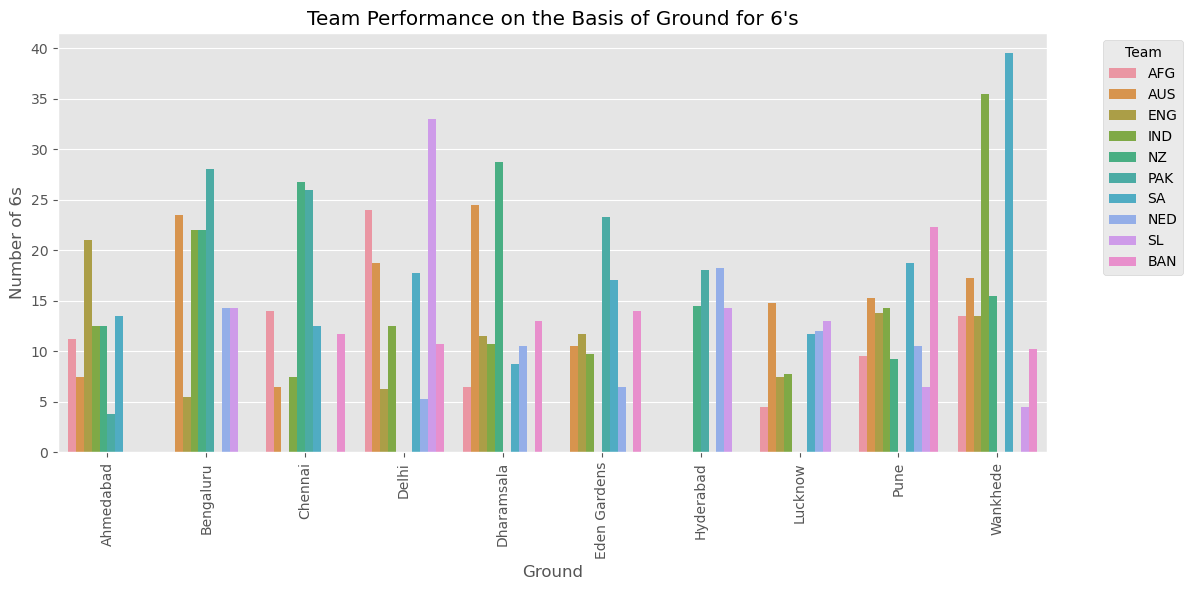

In [47]:
# team performance over different ground using 4's & 6's

ground_team_performance = wc_df.groupby(['ground', 'team'])[['4s', '6s']].sum().reset_index()

# Plotting 4's
plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='4s', hue='team', data=ground_team_performance)
plt.xlabel('Ground')
plt.ylabel('Number of 4s')
plt.title("Team Performance on the Basis of Ground for 4's")
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting 6's
plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='6s', hue='team', data=ground_team_performance)
plt.xlabel('Ground')
plt.ylabel('Number of 6s')
plt.title("Team Performance on the Basis of Ground for 6's")
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




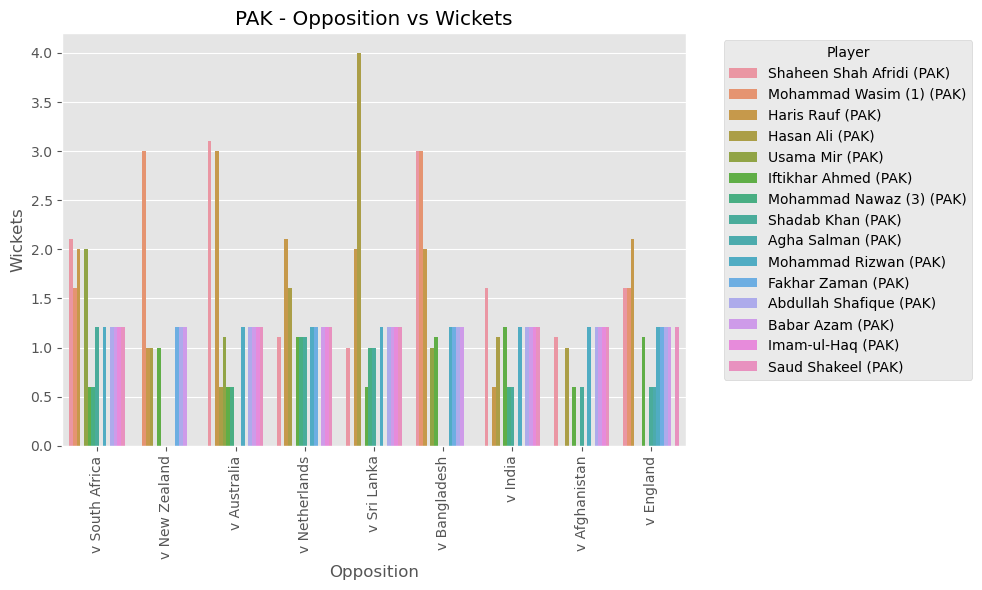

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




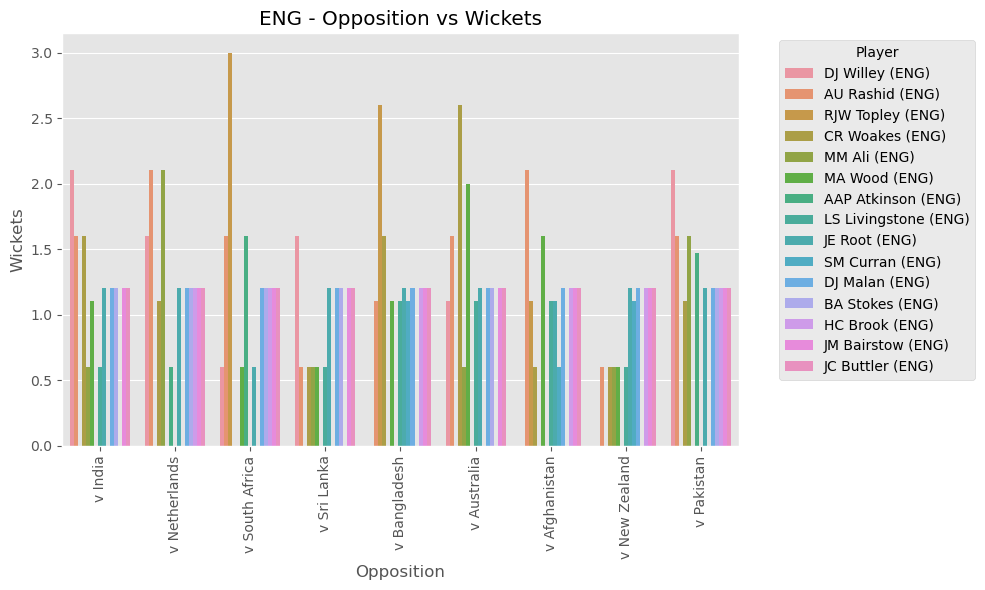

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




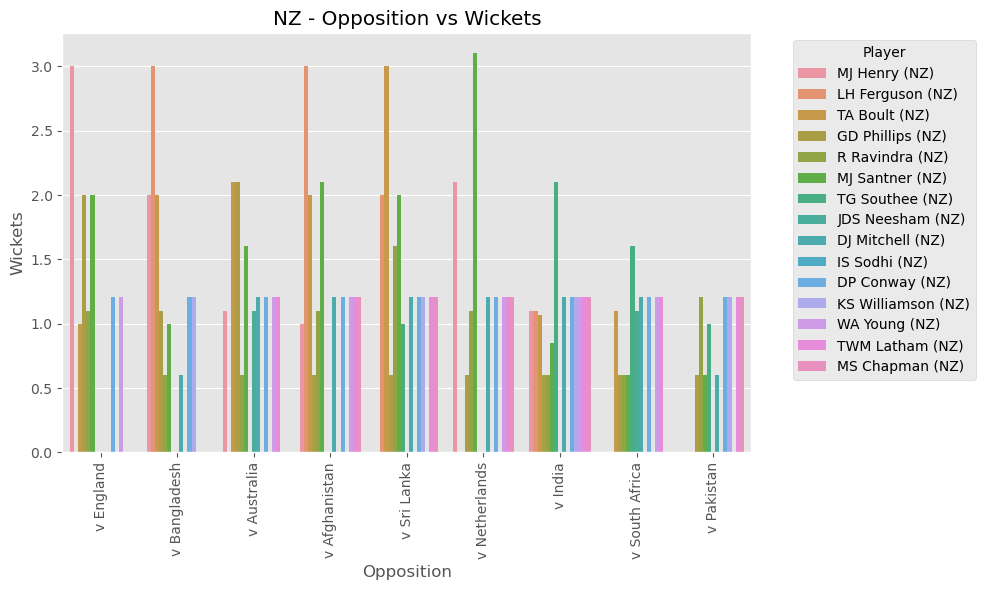

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




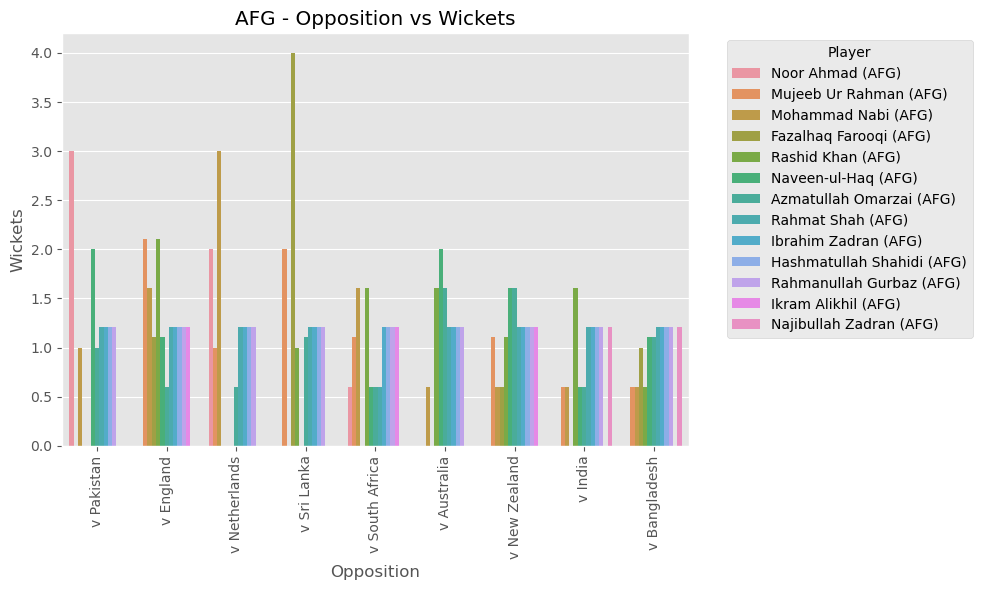

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




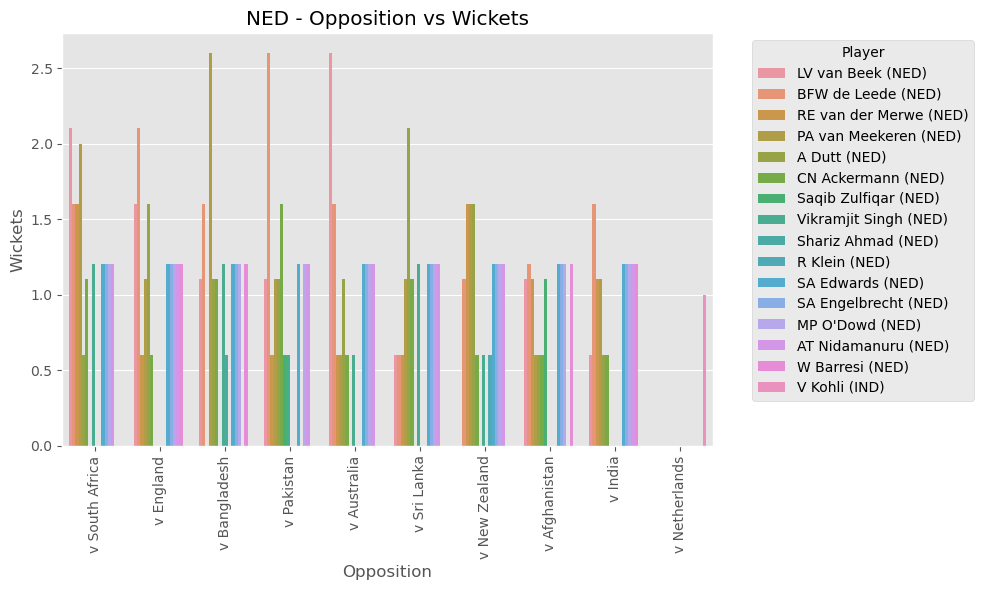

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




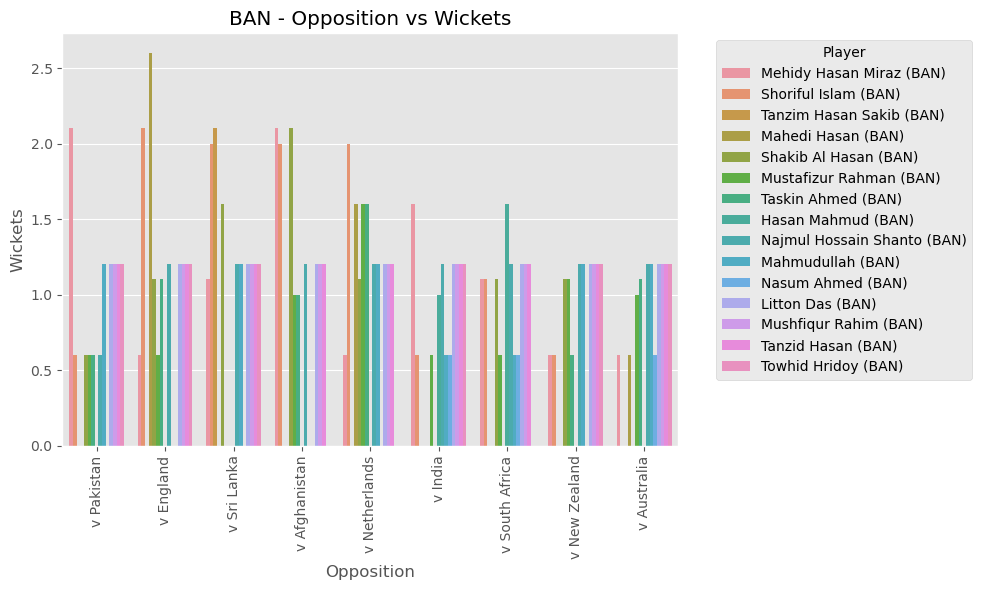

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




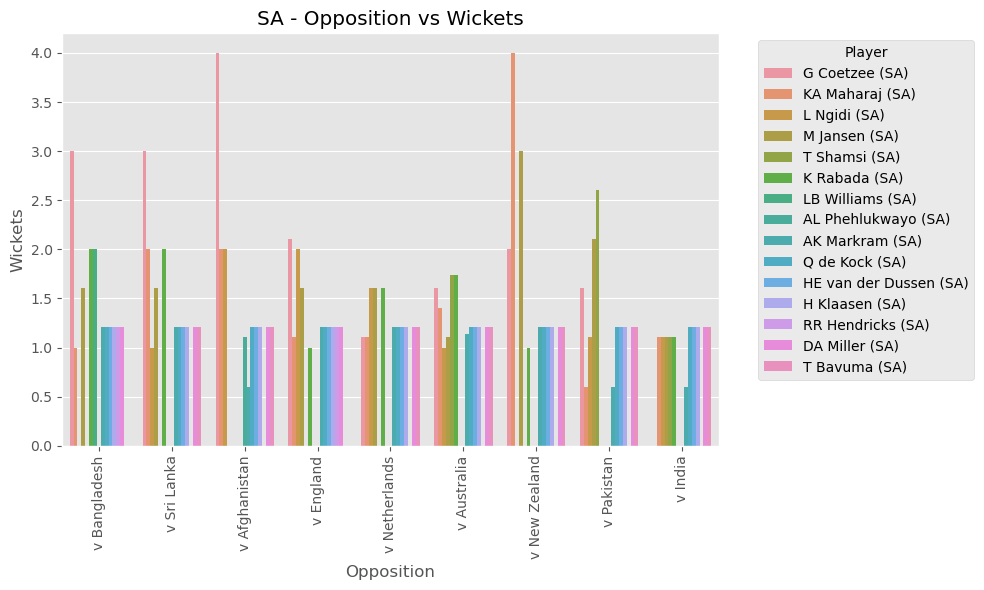

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




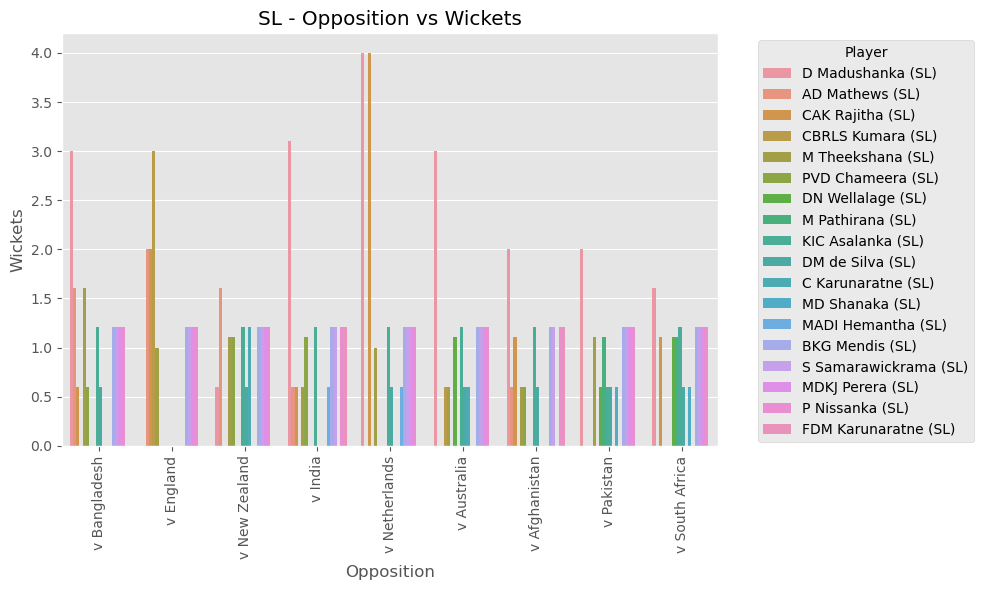

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




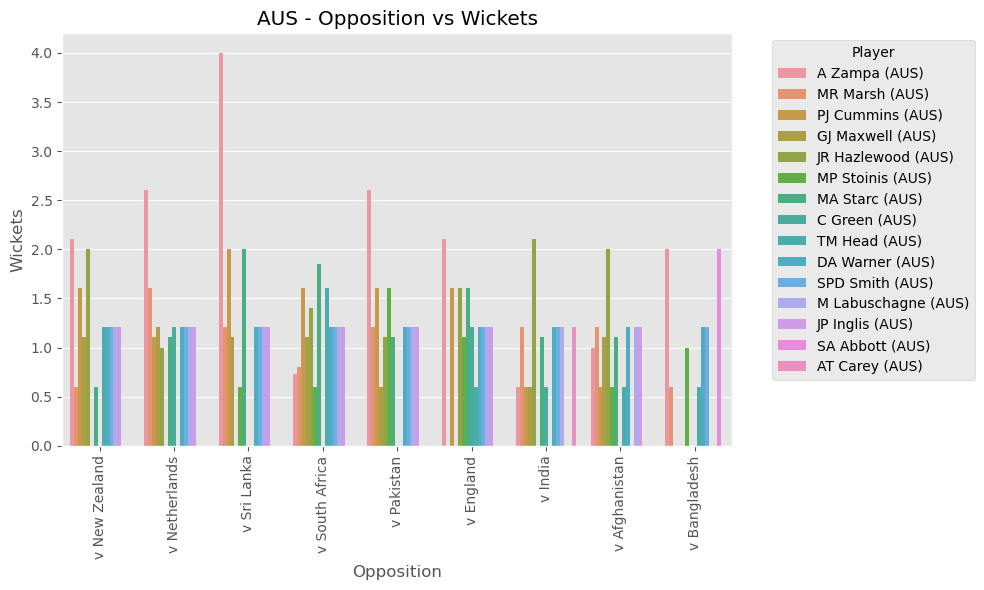

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\3942370861.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




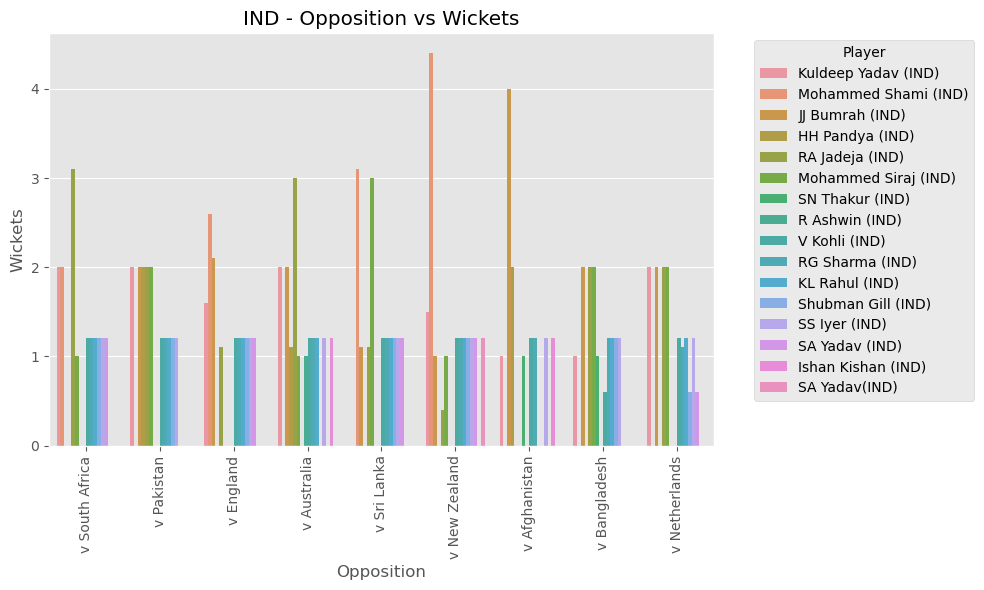

In [48]:
# wickets taken by player aganists opposition
eams = ['PAK', 'ENG', 'NZ', 'AFG', 'NED', 'BAN', 'SA', 'SL', 'AUS', 'IND']

# Assuming wc_df is your DataFrame containing the required data

for team in teams:
    # Filter data for the current team
    team_data = wc_df[wc_df['team'] == team]
    
    # Plot opposition vs wkts for the current team
    plt.figure(figsize=(10, 6))
    sns.barplot(x='opposition', y='wkts', hue='player', data=team_data, ci=None)
    plt.title(f'{team} - Opposition vs Wickets')
    plt.xlabel('Opposition')
    plt.ylabel('Wickets')
    plt.xticks(rotation=90)
    plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [49]:
teams = ['PAK', 'ENG', 'NZ', 'AFG', 'NED', 'BAN', 'SA', 'SL', 'AUS', 'IND']

# Iterate over each team
for team in teams:
    # Filter the data for the current team
    team_data = wc_df[wc_df['team'] == team]
    
    # Group by player and opposition, then calculate the total runs
    player_runs = team_data.groupby(['player', 'opposition'])['runs'].sum().reset_index()
    
    # Sort the data by runs in descending order
    player_runs_sorted = player_runs.sort_values(by='runs', ascending=False)
    
    # Select the top 10 entries
    top_10_runs = player_runs_sorted.head(10)
    
    print(f"Top 10 highest runs taken against opposition by a player for Team {team}:")
    print(top_10_runs)
    print("\n")

Top 10 highest runs taken against opposition by a player for Team PAK:
                       player     opposition  runs
65      Mohammad Rizwan (PAK)    v Sri Lanka   131
22         Fakhar Zaman (PAK)  v New Zealand   126
7     Abdullah Shafique (PAK)    v Sri Lanka   113
26           Haris Rauf (PAK)      v England    99
86  Shaheen Shah Afridi (PAK)      v England    97
89  Shaheen Shah Afridi (PAK)  v New Zealand    90
67   Mohammad Wasim (1) (PAK)      v England    90
77          Shadab Khan (PAK)  v Afghanistan    89
29           Haris Rauf (PAK)  v New Zealand    85
24           Haris Rauf (PAK)    v Australia    83


Top 10 highest runs taken against opposition by a player for Team ENG:
                player      opposition  runs
28      DJ Malan (ENG)    v Bangladesh   140
85       MA Wood (ENG)  v South Africa   119
14     BA Stokes (ENG)   v Netherlands   108
2   AAP Atkinson (ENG)  v South Africa    95
95    RJW Topley (ENG)  v South Africa    88
30      DJ Malan (ENG)   

In [51]:
wickets_by_player_opposition = wc_df.groupby(['player', 'opposition'])['wkts'].sum().reset_index()
top_10_wickets = wickets_by_player_opposition.sort_values(by='wkts', ascending=False).head(10)
print(top_10_wickets)

                        player      opposition       wkts
615       Mohammed Shami (IND)   v New Zealand  13.204626
497             MA Starc (AUS)  v South Africa   7.409253
704           PJ Cummins (AUS)  v South Africa   6.409253
140          D Madushanka (SL)         v India   6.204626
737            RA Jadeja (IND)  v South Africa   6.204626
529            MJ Santner (NZ)   v Netherlands   6.204626
617       Mohammed Shami (IND)     v Sri Lanka   6.204626
860  Shaheen Shah Afridi (PAK)     v Australia   6.204626
690      PA van Meekeren (NED)    v Bangladesh   5.204626
900              T Shamsi (SA)      v Pakistan   5.204626


In [52]:
team_runs = wc_df.groupby(['team', 'opposition'])['runs'].sum().reset_index()

# Sort the data by runs in descending order
team_runs_sorted = team_runs.sort_values(by='runs', ascending=False)

# Select the top 10 entries
top_10_runs = team_runs_sorted.head(10)

print("Top 10 highest runs taken against opposition by a team:")
print(top_10_runs)

Top 10 highest runs taken against opposition by a team:
   team      opposition  runs
41  IND   v New Zealand  1241
59   NZ         v India  1224
74   SA     v Australia   884
16  AUS  v South Africa   871
14  AUS   v New Zealand   758
56   NZ     v Australia   744
90   SL  v South Africa   733
81   SA     v Sri Lanka   726
89   SL      v Pakistan   675
72  PAK     v Sri Lanka   659


C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\2339016356.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14292\2339016356.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




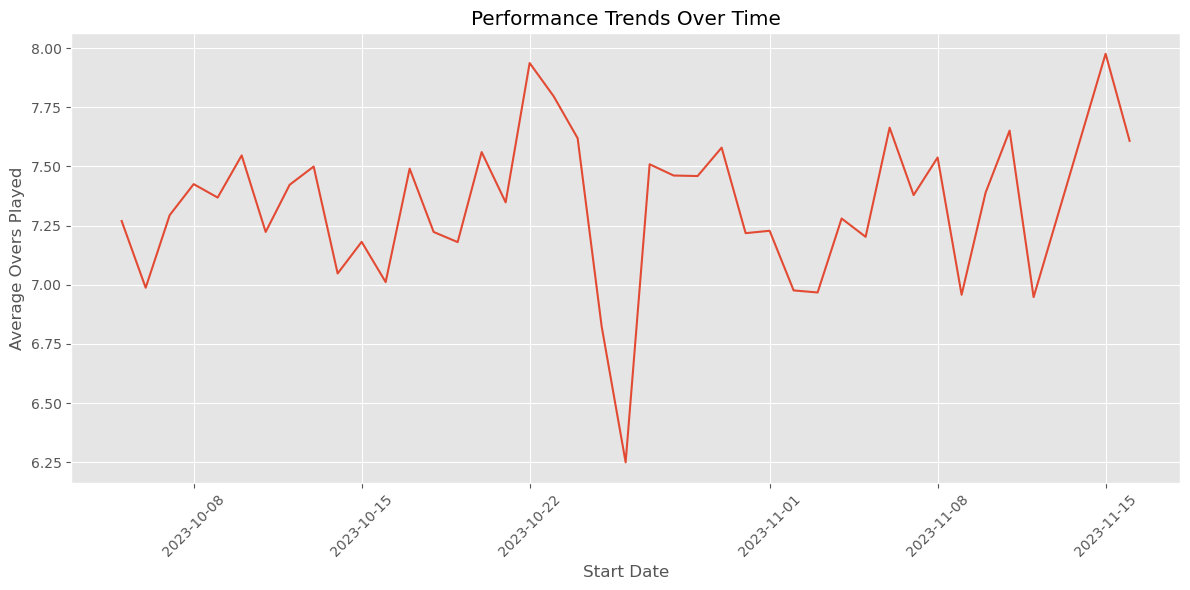

In [53]:
# Temporal analysis 
# Analysis performance of matched wrt start date

wc_df['start_date'] = pd.to_datetime(wc_df['start_date'])

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting performance trends over time using a binned line plot
sns.lineplot(x=wc_df['start_date'], y=wc_df['overs'], estimator='mean', ci=None)

# Adding labels and title
plt.title('Performance Trends Over Time')
plt.xlabel('Start Date')
plt.ylabel('Average Overs Played')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

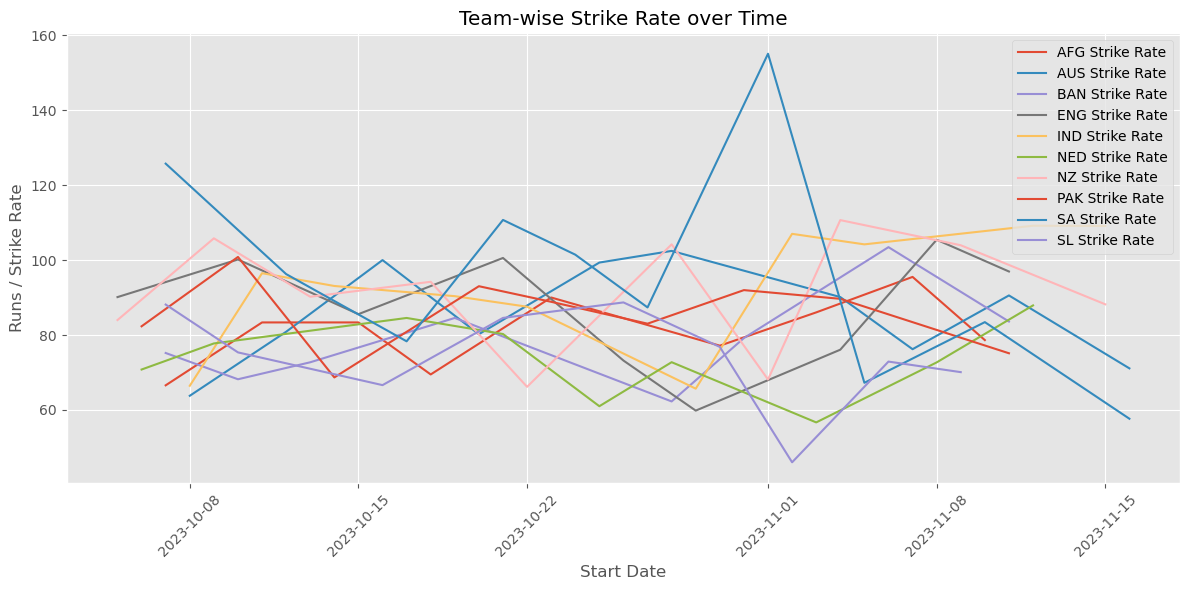

In [76]:
team_runs_sr = wc_df.groupby(['team', 'start_date']).agg({ 'sr': 'mean'}).reset_index()

# Plotting the line graph for each team
plt.figure(figsize=(12, 6))
for team_name, team_data in team_runs_sr.groupby('team'):
    plt.plot(team_data['start_date'], team_data['sr'], label=f"{team_name} Strike Rate")

# Adding labels and title
plt.xlabel('Start Date')
plt.ylabel('Runs / Strike Rate')
plt.title('Team-wise Strike Rate over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

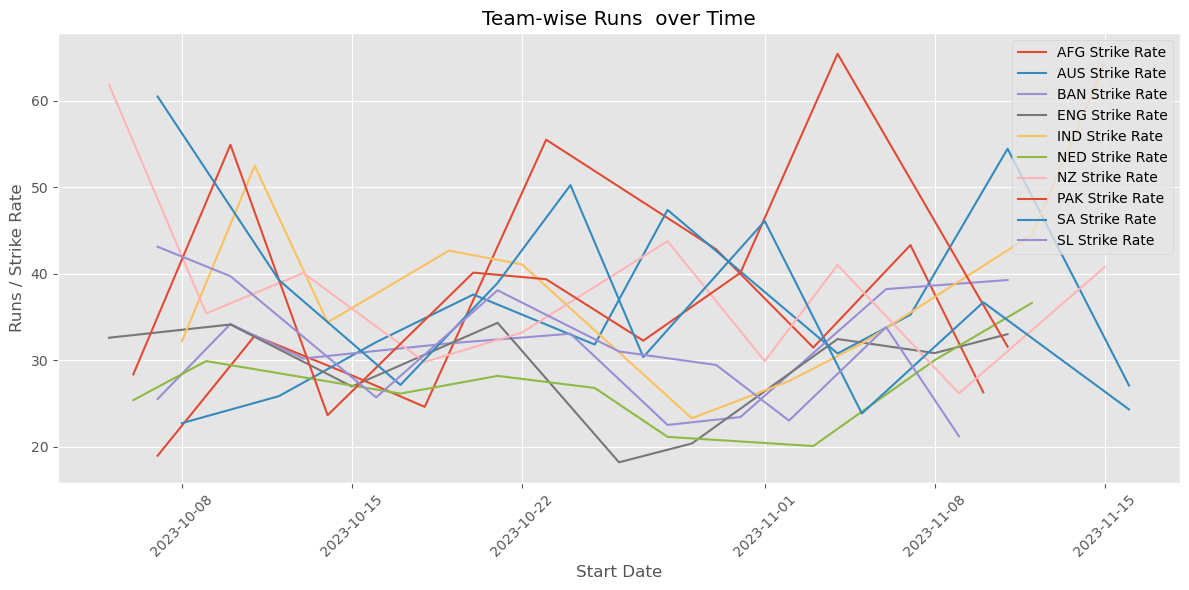

In [77]:
team_runs_sr = wc_df.groupby(['team', 'start_date']).agg({ 'runs': 'mean'}).reset_index()

# Plotting the line graph for each team
plt.figure(figsize=(12, 6))
for team_name, team_data in team_runs_sr.groupby('team'):
    plt.plot(team_data['start_date'], team_data['runs'], label=f"{team_name} Strike Rate")

# Adding labels and title
plt.xlabel('Start Date')
plt.ylabel('Runs / Strike Rate')
plt.title('Team-wise Runs  over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

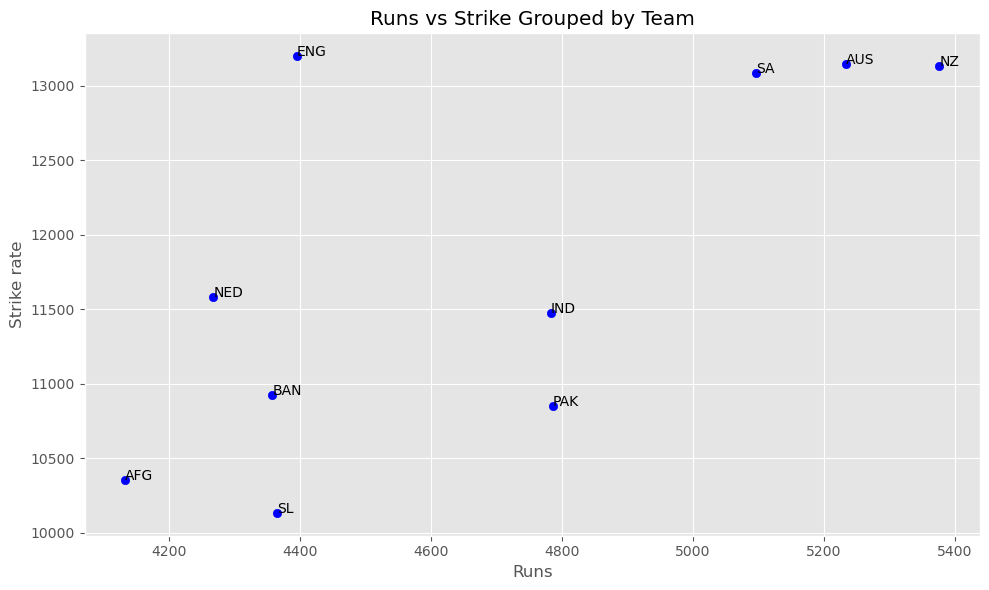

In [66]:
team_runs_wickets = wc_df.groupby('team').agg({'runs': 'sum', 'sr': 'sum'}).reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(team_runs_wickets['runs'], team_runs_wickets['sr'], color='blue')

# Adding labels and title
plt.xlabel('Runs')
plt.ylabel('Strike rate')
plt.title('Runs vs Strike Grouped by Team')

# Adding team names as annotations
for i, txt in enumerate(team_runs_wickets['team']):
    plt.annotate(txt, (team_runs_wickets['runs'][i], team_runs_wickets['sr'][i]))

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

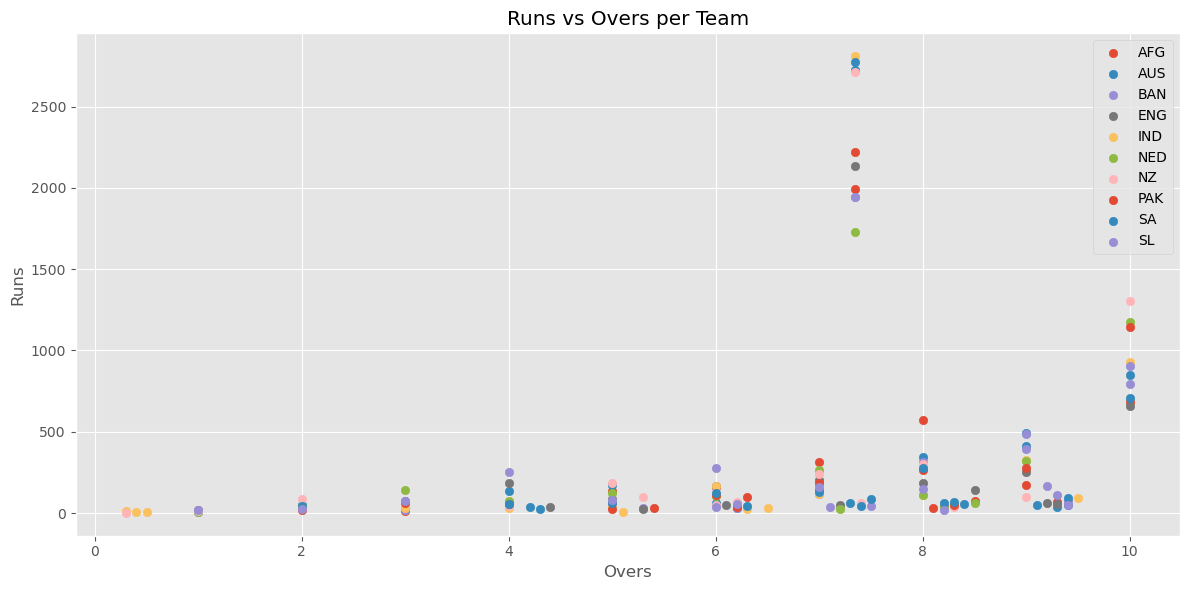

In [63]:
team_runs_wickets = wc_df.groupby(['team', 'overs']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()

# Plotting the scatterplot for each team
plt.figure(figsize=(12, 6))
for team_name, team_data in team_runs_wickets.groupby('team'):
    plt.scatter(team_data['overs'], team_data['runs'], label=team_name)

# Adding labels and title
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.title('Runs vs Wickets(per over) per Team')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.tight_layout()
plt.show()